In [229]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [230]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [231]:
from IPython.display import display

In [232]:
import plotly.express as px
from IPython.display import display, HTML

In [233]:
path = os.getcwd()
files = os.listdir(path)

In [234]:
# create the new directory where every exported document will be saved

from datetime import datetime

currentDateTime= datetime.now()
currentDateTime= str(currentDateTime)

fname = 'resumeAnalisis'+' '+currentDateTime[0:4]+\
currentDateTime[5:7]+\
currentDateTime[8:10]+\
currentDateTime[11:13]+\
currentDateTime[14:16]+\
currentDateTime[17:19]+'.csv'
directory = './repro'

if not os.path.exists(directory):
    os.mkdir(directory)
                        
path2 = os.path.join(directory, fname)
#mtcarr.to_csv(str(path2), encoding='UTF-8-sig')

In [235]:
cb1 = [f for f in files if f[-4:] == 'xlsx' and f[:4] == 'bcxz']

In [236]:
cb2 = pd.DataFrame()
for f in cb1:
    datos = pd.read_excel(f)
    cb2 = pd.concat([cb2,datos], axis=0)
    
cb2 = cb2.rename(columns = {'CLV_CENTRO':'CCT','CARRERA':'CARR',
                            'GENERACION':'GEN','SEMESTRE':'SEM',
                            'GRUPO':'GPO','NO CONTROL':'NCONT',
                            'NOMBRE':'NOM','PATERNO':'PAT',
                            'MATERNO':'MAT','NOMBRE ASIGNATURA':'ASIG',
                            'NOMBRE DOCENTE':'DOC','RFC DOCENTE':'RFCDOC',
                            'PERIODO 1':'PAR1','PERIODO 2':'PAR2',
                            'PERIODO 3':'PAR3','CALIFICACION':'CALIF',
                            'ASISTENCIA PERIODO 1':'AS1','ASISTENCIA PERIODO 2':'AS2',
                            'ASISTENCIA PERIODO 3':'AS3','TIPO ACRED.':'TACRED'
                           })

In [237]:
cb3 = cb2.iloc[:,1:24]

In [238]:
cb3['NCONT'] = cb3['NCONT'].apply(str)

In [239]:
del cb3['TACRED']

In [240]:
cb3['SEX']=cb3['CURP'].str[10]

In [241]:
cb3.loc[(cb3.CARR == 'COMPONENTE BASICO Y PROPEDEUTICO'), 'CARR'] = 'CBYP'
cb3.loc[(cb3.CARR == 'TÉCNICO AGROPECUARIO') , 'CARR'] = 'TAGP'
cb3.loc[(cb3.CARR == 'TÉCNICO EN EXPLOTACIÓN GANADERA') , 'CARR'] = 'TEGN'
cb3.loc[(cb3.CARR == 'TÉCNICO EN PROGRAMACIÓN') , 'CARR'] = 'TPGM'
cb3.loc[(cb3.CARR == 'TéCNICO EN ADMINISTRACIóN DE EMPRENDIMIENTOS') , 'CARR'] = 'TAEM'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN PARA EL EMPRENDIMIENTO AGROPECUARIO') , 'CARR'] = 'TAEA'
cb3.loc[(cb3.CARR == 'TÉCNICO EN OFIMÁTICA') , 'CARR'] = 'TOFI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN VITICULTURA') , 'CARR'] = 'TVIT'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN EN MIPYMES') , 'CARR'] = 'TMPY'
cb3.loc[(cb3.CARR == 'TÉCNICO EN SOPORTE Y MANTENIMIENTO DE EQUIPO DE CÓMPUTO') , 'CARR'] = 'TSMEC'
cb3.loc[(cb3.CARR == 'TÉCNICO EN RECURSOS HÍDRICOS') , 'CARR'] = 'T_RHI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN LOGÍSTICA') , 'CARR'] = 'T_LGI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN DE RECURSOS HUMANOS') , 'CARR'] = 'T_ARH'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ACUACULTURA') , 'CARR'] = 'T_ACU'

In [242]:
cb3.loc[(cb3.CARR == 'COMPONENTE BASICO Y PROPEDEUTICO'), 'CARR'] = 'CBYP'
cb3.loc[(cb3.CARR == 'TÉCNICO AGROPECUARIO') , 'CARR'] = 'TAGP'
cb3.loc[(cb3.CARR == 'TÉCNICO EN EXPLOTACIÓN GANADERA') , 'CARR'] = 'TEGN'
cb3.loc[(cb3.CARR == 'TÉCNICO EN PROGRAMACIÓN') , 'CARR'] = 'TPGM'
cb3.loc[(cb3.CARR == 'TéCNICO EN ADMINISTRACIóN DE EMPRENDIMIENTOS') , 'CARR'] = 'TAEM'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN PARA EL EMPRENDIMIENTO AGROPECUARIO') , 'CARR'] = 'TAEA'
cb3.loc[(cb3.CARR == 'TÉCNICO EN OFIMÁTICA') , 'CARR'] = 'TOFI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN VITICULTURA') , 'CARR'] = 'TVIT'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN EN MIPYMES') , 'CARR'] = 'TMPY'
cb3.loc[(cb3.CARR == 'TÉCNICO EN SOPORTE Y MANTENIMIENTO DE EQUIPO DE CÓMPUTO') , 'CARR'] = 'TSMEC'
cb3.loc[(cb3.CARR == 'TÉCNICO EN RECURSOS HÍDRICOS') , 'CARR'] = 'T_RHI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN LOGÍSTICA') , 'CARR'] = 'T_LGI'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ADMINISTRACIÓN DE RECURSOS HUMANOS') , 'CARR'] = 'T_ARH'
cb3.loc[(cb3.CARR == 'TÉCNICO EN ACUACULTURA') , 'CARR'] = 'T_ACU'

In [243]:
cb3.loc[cb3["ASIG"] == "TECNOLOGÍAS DE LA INFORMACIÓN Y LA COMUNICACIÓN", "ASIG"] = 'TIC'
cb3.loc[cb3["ASIG"] == "LECTURA, EXPRESIÓN ORAL Y ESCRITA I", "ASIG"] = 'LEOYE'

cb3.loc[cb3["ASIG"] == "TEMAS DE CIENCIAS DE LA SALUD", "ASIG"] = 'TCSD'
cb3.loc[cb3["ASIG"] == "Reacciones químicas, conservación de la materia en la formación de nuevas substancias.", "ASIG"] = 'RQCMFNS'
cb3.loc[cb3["ASIG"] == "Formación socioemocional IV", "ASIG"] = 'FSE IV'
cb3.loc[cb3["ASIG"] == "INTRODUCCIÓN AL DERECHO", "ASIG"] = 'INDRCHO'
cb3.loc[cb3["ASIG"] == "Conciencia histórica I. Perspectivas del México antiguo en los contextos globales", "ASIG"] = 'CNHIST_1'
cb3.loc[cb3["ASIG"] == "APOYA EN LA REALIZACIÓN DE TRÁMITES JURÍDICO-ADMINISTRATIVOS", "ASIG"] = 'APRTRJADM'
cb3.loc[cb3["ASIG"] == "Lengua y comunicación II", "ASIG"] = 'LyC II'
cb3.loc[cb3["ASIG"] == "Opera una red LAN", "ASIG"] = 'ORLAN'
cb3.loc[cb3["ASIG"] == "Ensambla e instala controladores y dispositivos periféricos", "ASIG"] = 'ENINCDPP'
cb3.loc[cb3["ASIG"] == "PARTICIPA EN LA ESTRUCTURACIÓN DEL PLAN DE NEGOCIO", "ASIG"] = 'PEPLANNEG'
cb3.loc[cb3["ASIG"] == "Colabora en la planificación, organización, dirección y control de la unidad económica", "ASIG"] = 'CPODCUNIDE'
cb3.loc[cb3["ASIG"] == "Instala una red LAN", "ASIG"] = 'IRLAN'
cb3.loc[cb3["ASIG"] == "Cálculo diferencial", "ASIG"] = 'CALCDF'
cb3.loc[cb3["ASIG"] == "PROBABILIDAD Y ESTADÍSTICA", "ASIG"] = 'PROyEST'
cb3.loc[cb3["ASIG"] == "Produce cultivos agrícolas a cielo abierto", "ASIG"] = 'PCTVCLA'
cb3.loc[cb3["ASIG"] == "Formación socioemocional II", "ASIG"] = 'FSE II'
cb3.loc[cb3["ASIG"] == "Procesa productos cárnicos", "ASIG"] = 'PPRODCARN'
cb3.loc[cb3["ASIG"] == "MATEMÁTICAS APLICADAS", "ASIG"] = 'MATAPL'
cb3.loc[cb3["ASIG"] == "Temas selectos de matemáticas I", "ASIG"] = 'SELECTMAT_I'
cb3.loc[cb3["ASIG"] == "TEMAS DE BIOLOGÍA CONTEMPORÁNEA", "ASIG"] = 'TBIOLCONT'
cb3.loc[cb3["ASIG"] == "Opera proyecto productivo agropecuario", "ASIG"] = 'OPPROYAGR'
cb3.loc[cb3["ASIG"] == "Maneja aves y otras especies alternas", "ASIG"] = 'MAVES'
cb3.loc[cb3["ASIG"] == "Maneja especies monogástricas", "ASIG"] = 'MONOGAS'
cb3.loc[cb3["ASIG"] == "Maneja especies poligástricas", "ASIG"] = 'POLIGAS'
cb3.loc[cb3["ASIG"] == "INTRODUCCIÓN A LA ECONOMÍA", "ASIG"] = 'INTECON'
cb3.loc[cb3["ASIG"] == "Registra operaciones contables de la unidad económica", "ASIG"] = 'RGCONTUECO'
cb3.loc[cb3["ASIG"] == "Cultura digital II", "ASIG"] = 'CDIGIT_II'
cb3.loc[cb3["ASIG"] == "Brinda soporte técnico a distancia", "ASIG"] = 'SOTECDIST'
cb3.loc[cb3["ASIG"] == "PARTICIPA EN LA ELABORACIÓN Y PRESENTACIÓN DEL PLAN DE MERCADOTECNIA PARA EL LANZAMIENTO UN PRODUCTO O SERVICIO", "ASIG"] = 'PMERCALNZ'
cb3.loc[cb3["ASIG"] == "Instala y configura software", "ASIG"] = 'INSTSOFT'
cb3.loc[cb3["ASIG"] == "Ciencias sociales II", "ASIG"] = 'CS_II'
cb3.loc[cb3["ASIG"] == "Ciencias sociales III", "ASIG"] = 'CS_III'
cb3.loc[cb3["ASIG"] == "APOYA EN LA IDENTIFICACIÓN DE LA MERCADOTECNIA DE UN PLAN DE NEGOCIOS", "ASIG"] = 'AMERCANEG'
cb3.loc[cb3["ASIG"] == "Elabora perfil de proyectos agropecuarios", "ASIG"] = 'EPRFPRYAGR'
cb3.loc[cb3["ASIG"] == "Brinda soporte técnico de manera presencial", "ASIG"] = 'BRSPRTPRSNC'
cb3.loc[cb3["ASIG"] == "Produce insumos orgánicos para la agricultura", "ASIG"] = 'PRIMORGAG'
cb3.loc[cb3["ASIG"] == "Procesa productos hortofrutícolas", "ASIG"] = 'PHORTOFRU'
cb3.loc[cb3["ASIG"] == "La conservación de la energía y su interacción con la materia", "ASIG"] = 'CNSENRGINTMT'
cb3.loc[cb3["ASIG"] == "Produce cultivos en agricultura protegida", "ASIG"] = 'CLTVPRTG'
cb3.loc[cb3["ASIG"] == "Procesa productos lácteos", "ASIG"] = 'PRLACTEO'
cb3.loc[cb3["ASIG"] == "PARTICIPA EN LA ELABORACIÓN DEL ESTUDIO DE MERCADO", "ASIG"] = 'PESTMERCA'
cb3.loc[cb3["ASIG"] == "TEMAS DE FÍSICA", "ASIG"] = 'TEMFIS'

cb3.loc[cb3["ASIG"] == "TEMAS DE FILOSOFÍA", "ASIG"] = 'TEMFIL'
cb3.loc[cb3["ASIG"] == "TEMAS DE CIENCIAS SOCIALES", "ASIG"] = 'TEMCS'
cb3.loc[cb3["ASIG"] == "Pensamiento matemático II", "ASIG"] = 'PM_II'
cb3.loc[cb3["ASIG"] == "Pensamiento matemático I", "ASIG"] = 'PM_I'
cb3.loc[cb3["ASIG"] == "PARTICIPA EN EL PROCESO DE LANZAMIENTO DE UN PRODUCTO O SERVICIO", "ASIG"] = 'LANZPRODSERV'
cb3.loc[cb3["ASIG"] == "Opera proyectos de desarrollo sustentable", "ASIG"] = 'OPRYDESSUST'
cb3.loc[cb3["ASIG"] == "Instala y opera redes de computadoras", "ASIG"] = 'IREDCOMP'
cb3.loc[cb3["ASIG"] == "Maneja especies pecuarias", "ASIG"] = 'ESPPECUAR'
cb3.loc[cb3["ASIG"] == "Produce cultivos para la alimentación y la industria", "ASIG"] = 'PCALTNDUST'
cb3.loc[cb3["ASIG"] == "Procesa productos agropecuarios", "ASIG"] = 'PROCESAGRO'

cb3.loc[cb3["ASIG"] == "PARTICIPA EN LA ELABORACIÓN DEL PLAN DE NEGOCIO", "ASIG"] = 'ELABNEGO'
cb3.loc[cb3["ASIG"] == "Ensambla, configura e instala hardware y software en el equipo de cómputo", "ASIG"] = 'ENHARDSOFT'
cb3.loc[cb3["ASIG"] == "Proporciona soporte técnico presencial o a distancia en software de aplicación y hardware", "ASIG"] = 'SPTECSOFTHARD'
cb3.loc[cb3["ASIG"] == "GESTIONA PROCESOS ADMINISTRATIVOS Y CONTABLES BÁSICOS DE LA UNIDAD ECONÓMICA", "ASIG"] = 'GESTADMCONTAUE'


In [244]:
data = [
    ['TIC','Tecnologías de la Información y la Comunicación'],
    ['LEOYE','Lectura, Expresión Oral y Escrita I',],
    ['TCSD','Temas de Ciencia y de la Salud'],
    ['RQCMFNS','Reacciones Químicas, Conservación de la Materia en la Formación de Nuevas Substancias'],
    ['FSE IV','Formación Socioemocional IV'],
    ['INDRCHO','Introducción al Derecho'],
    ['CNHIST I','Conciencia Histórica I'],
    ['APRTRJADM','Apoya en la Realización de Trámites Jurídico-Administrativos'],
    ['LyC II','Lengua y Comunicación II'],
    ['ORLAN','Opera una Red LAN'],
    ['ENINCDPP','Ensambla e Instala Controladores y Dispositivos Periféricos'],
    ['PEPLANNEG','Participa en la Estructuración del Plan de Negocio'],
    ['CPODCUNIDE','Colabora en la Planificación, Organización, Dirección y Control de la Unidad Económica'],
    ['IRLAN','Instala una Red LAN'],
    ['CALCDF','Cálculo Diferencial'],
    ['PROyEST','Probabilidad y Estadística'],
    ['PCTVCLA','Produce Cultivos Agrícolas a Cielo Abierto'],
    ['FSE II','Formación Socioemocional II'],
    ['PPRODCARN','Procesa Productos Cárnicos'],
    ['PPRODCARN','Procesa Productos Cárnicos'],
    ['MATAPL','Matemáticas Aplicadas'],
    ['SELECTMAT I','Temas Selectos de Matemáticas I'],
    ['TBIOLCONT','Temas de Biología Contemporánea'],
    ['OPPROYAGR','Opera Proyecto Productivo Agropecuario'],
    ['MAVES','Maneja Aves y Otras Especies Alternas'],
    ['MONOGAS','Maneja Especies Monogástricas'],
    ['POLIGAS','Maneja Especies Poligástricas'],
    ['INTECON','Introducción a la Economía'],
    ['RGCONTUECO','Registra Operaciones Contables de la Unidad Económica'],
    ['CDIGIT_II','Cultura Digital II'],
    ['PMERCALNZ','Participa en la Elaboración y Presentación del Plan de Mercadotécnia para el Lanzamiento de Producto o Servicio'],
    ['INSTSOFT','Instala y Configura Software'],
    ['CS II','Ciencias Sociales II'],
    ['CS III','Ciencias Sociales III'],
    ['AMERCANEG','Apoya en la Identificación de la Mercadotécnia en un Plan de Negocios'],
    ['SOTECDIST','Brinda soporte técnico a distancia'],
    ['EPRFPRYAGR','Elabora Perfil de Proyectos Agropecuarios'],
    ['BRSPRTPRSNC','Brinda Soporte Técnico de Manera Presencial'],
    ['PRIMORGAG','Produce Insumos Orgánicos para la Agricultura'],
    ['PHORTOFRU','Procesa Productos Hortofrutícolas'],
    ['CNSENRGINTMT','La Conservación de la Energía y su Interacción con la Materia'],
    ['CLTVPRTG','Produce Cultivos en Agricultura Protegida'],
    ['PRLACTEO','Procesa Productos Lácteos'],
    ['PESTMERCA','Participa en la Elaboración del Estudio de Mercado'],
    ['TEMFIS','Temas de Física'],
    ['TEMFIL','Temas de Filosofía'],
    ['TEMCS','Temas de Ciencias Sociales'],
    ['PM II','Pensamiento Matemático II'],
    ['PM I','Pensamiento Matemático I'],
    ['LANZPRODSERV','Participa en el Proceso de Lanzamiento de un Producto o Servicio'],
    ['OPRYDESSUST','Opera Proyectos de Desarrollo Sustentable'],
    ['IREDCOMP','Instala y Opera Redes de Computadoras'],
    ['ESPPECUAR','Maneja Especies Pecuarias'],
    ['PCALTNDUST','Produce Cultivos para la Alimentación y la Industria'],
    ['PROCESAGRO','Procesa Productos Agropecuarios'],
    ['ELABNEGO','Participa en la Elaboración del Plan de Negocio'],
    ['ENHARDSOFT','Ensambla, Configura e Instala Hardware y Software en el Equipo de Cómputo'],
    ['SPTECSOFTHARD','Proporciona Soporte Técnico Presencial o a Distancia en Software de Aplicación y Hardware'],
    ['GESTADMCONTAUE','Gestiona Procesos Administrativos y COntables Básicos de la Unidad Económica'],

       ]


In [245]:
df = pd.DataFrame(data, columns=['CODE', 'Unidad de Aprendizaje'])
df = df.reset_index()
df = df.sort_values('CODE')
df = df.reset_index()
df =  df.iloc[:,[2,3]]
glosario = df
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(glosario)

CODE  \
0        AMERCANEG   
1        APRTRJADM   
2      BRSPRTPRSNC   
3           CALCDF   
4        CDIGIT_II   
5         CLTVPRTG   
6         CNHIST I   
7     CNSENRGINTMT   
8       CPODCUNIDE   
9            CS II   
10          CS III   
11        ELABNEGO   
12      ENHARDSOFT   
13        ENINCDPP   
14      EPRFPRYAGR   
15       ESPPECUAR   
16          FSE II   
17          FSE IV   
18  GESTADMCONTAUE   
19         INDRCHO   
20        INSTSOFT   
21         INTECON   
22        IREDCOMP   
23           IRLAN   
24    LANZPRODSERV   
25           LEOYE   
26          LyC II   
27          MATAPL   
28           MAVES   
29         MONOGAS   
30       OPPROYAGR   
31     OPRYDESSUST   
32           ORLAN   
33      PCALTNDUST   
34         PCTVCLA   
35       PEPLANNEG   
36       PESTMERCA   
37       PHORTOFRU   
38            PM I   
39           PM II   
40       PMERCALNZ   
41         POLIGAS   
42       PPRODCARN   
43       PPRODCARN   
44       PRIMORGAG   
45        PRLACTEO   
46      PROCESAGRO   
47         PROyEST   
48      RGCONTUECO   
49         RQCMFNS   
50     SELECTMAT I   
51       SOTECDIST   
52   SPTECSOFTHARD   
53       TBIOLCONT   
54            TCSD   
55           TEMCS   
56          TEMFIL   
57          TEMFIS   
58             TIC   

                                                                                              Unidad de Aprendizaje  
0                                             Apoya en la Identificación de la Mercadotécnia en un Plan de Negocios  
1                                                      Apoya en la Realización de Trámites Jurídico-Administrativos  
2                                                                       Brinda Soporte Técnico de Manera Presencial  
3                                                                                               Cálculo Diferencial  
4                                                                                                Cultura Digital II  
5                                                                         Produce Cultivos en Agricultura Protegida  
6                                                                                            Conciencia Histórica I  
7                                                     La Conservación de la Energía y su Interacción con la Materia  
8                            Colabora en la Planificación, Organización, Dirección y Control de la Unidad Económica  
9                                                                                              Ciencias Sociales II  
10                                                                                            Ciencias Sociales III  
11                                                                  Participa en la Elaboración del Plan de Negocio  
12                                        Ensambla, Configura e Instala Hardware y Software en el Equipo de Cómputo  
13                                                      Ensambla e Instala Controladores y Dispositivos Periféricos  
14                                                                        Elabora Perfil de Proyectos Agropecuarios  
15                                                                                        Maneja Especies Pecuarias  
16                                                                                      Formación Socioemocional II  
17                                                                                      Formación Socioemocional IV  
18                                     Gestiona Procesos Administrativos y COntables Básicos de la Unidad Económica  
19                                                                                          Introducción al Derecho  
20                                                                                     Instala y Configura Software  
21                                                                                       Introduc

In [246]:
#cb3.iloc[2038,1:11]

In [247]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(cb3[cb3['PAR1'].isnull()])

PLANTEL   CARR          GEN     TURNO  SEM GPO           NCONT  \
2038  CBTA 205   TAEA  2021 - 2024  matutino    6  6A  21101012050032   
2039  CBTA 205   TAEA  2021 - 2024  matutino    6  6A  21101012050093   
2040  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050014   
2041  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050016   
2042  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050018   
2043  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050019   
2044  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050021   
2045  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050026   
2046  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050027   
2047  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050037   
2048  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050052   
2049  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050067   
2050  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050075   
2051  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050077   
2052  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050086   
2053  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050087   
2054  CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050095   
2055  CBTA 205   TAGP  2021 - 2024  matutino    6  6A  21101012050062   
2056  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050002   
2057  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050003   
2058  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050007   
2059  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050008   
2060  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050010   
2061  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050012   
2062  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050017   
2063  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050024   
2064  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050029   
2065  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050030   
2066  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050032   
2067  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050040   
2068  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050045   
2069  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050048   
2070  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050057   
2071  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050058   
2072  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050059   
2073  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050060   
2074  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050063   
2075  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050066   
2076  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050071   
2077  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050074   
2078  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050078   
2079  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050082   
2080  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050084   
2081  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050085   
2082  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050092   
2083  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050093   
2084  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050103   
2085  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050105   
2086  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050110   
2087  CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050112   
2088  CBTA 205   TAGP    2022-2025  matutino    6  6A  22101012050114   
2089  CBTA 205  TSMEC  2021 - 2024  matutino    6  6A  21101012050094   
2090  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050005   
2091  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  2210101205

In [248]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(cb3)

PLANTEL   CARR          GEN     TURNO  SEM GPO           NCONT  \
0     CBTA 205   TAEA  2021 - 2024  matutino    6  6A  21101012050032   
1     CBTA 205   TAEA  2021 - 2024  matutino    6  6A  21101012050093   
2     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050016   
3     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050019   
4     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050021   
5     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050026   
6     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050027   
7     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050075   
8     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050087   
9     CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050002   
10    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050003   
11    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050008   
12    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050012   
13    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050017   
14    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050032   
15    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050045   
16    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050048   
17    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050057   
18    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050058   
19    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050060   
20    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050066   
21    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050074   
22    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050078   
23    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050085   
24    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050093   
25    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050103   
26    CBTA 205   TAGP    2022-2025  matutino    6  6A  22101012050114   
27    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050020   
28    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050025   
29    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050038   
30    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050043   
31    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050068   
32    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050079   
33    CBTA 205  TSMEC    2022-2025  matutino    6  6A  22101012050113   
34    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050001   
35    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050001   
36    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050007   
37    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050007   
38    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050012   
39    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050012   
40    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050013   
41    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050013   
42    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050014   
43    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050014   
44    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050015   
45    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050015   
46    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050018   
47    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050018   
48    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050020   
49    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050020   
50    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050021   
51    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050021   
52    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050023   
53    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  2310101205

In [249]:
cb3 = cb3[cb3['PAR1'].notna()]

In [250]:
cb3.columns

Index(['PLANTEL', 'CARR', 'GEN', 'TURNO', 'SEM', 'GPO', 'NCONT', 'NOM', 'PAT',
       'MAT', 'CURP', 'ASIG', 'DOC', 'RFCDOC', 'PAR1', 'PAR2', 'PAR3', 'CALIF',
       'AS1', 'AS2', 'AS3', 'PERIODO', 'SEX'],
      dtype='object')

In [251]:
prefix = 'FSE'

In [252]:
cb3 = cb3[~cb3['ASIG'].str.startswith(prefix)]

In [253]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(cb3)

PLANTEL   CARR          GEN     TURNO  SEM GPO           NCONT  \
0     CBTA 205   TAEA  2021 - 2024  matutino    6  6A  21101012050032   
1     CBTA 205   TAEA  2021 - 2024  matutino    6  6A  21101012050093   
2     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050016   
3     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050019   
4     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050021   
5     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050026   
6     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050027   
7     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050075   
8     CBTA 205   TAEA  2022 - 2025  matutino    6  6A  22101012050087   
9     CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050002   
10    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050003   
11    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050008   
12    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050012   
13    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050017   
14    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050032   
15    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050045   
16    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050048   
17    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050057   
18    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050058   
19    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050060   
20    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050066   
21    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050074   
22    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050078   
23    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050085   
24    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050093   
25    CBTA 205   TAGP  2022 - 2025  matutino    6  6A  22101012050103   
26    CBTA 205   TAGP    2022-2025  matutino    6  6A  22101012050114   
27    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050020   
28    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050025   
29    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050038   
30    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050043   
31    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050068   
32    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050079   
33    CBTA 205  TSMEC    2022-2025  matutino    6  6A  22101012050113   
34    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050001   
37    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050007   
38    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050012   
41    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050013   
42    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050014   
44    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050015   
47    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050018   
49    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050020   
51    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050021   
52    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050023   
54    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050024   
56    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050025   
58    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050027   
59    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050029   
61    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050036   
63    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050038   
65    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050040   
67    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050042   
70    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  23101012050045   
72    CBTA 205   TAGP  2023 - 2026  matutino    4  4A  2310101205

In [254]:
#cb3 = cb3.fillna('.')
#cb3['PAR1'] = cb3['PAR1'].apply(lambda x: int(x) if x.isdigit() else 0)

#cb3.loc[cb3.PAR1 == 'AC', 'PAR1'] = 5
#cb3 = cb3[~cb3[ASIG].str.startswith('FSE')]

cb3['MAT'] = cb3['MAT'].fillna('_')
#cb3['PAR1'] = cb3['PAR1'].fillna(5)

#cb3['PAR1'] = pd.to_numeric(cb3['PAR1'])
cb3['PAR1'] = cb3['PAR1'].astype(int)
#cb3['PAR1'] = pd.to_numeric(cb3['PAR1'], errors='coerce')
cbx = cb3

In [255]:
tot_carreras = cbx['CARR'].nunique()
tot_carreras

4

In [256]:
#Con "a" y sus derivados asociados se obtendrá el %Rep por semestre

a = cbx.loc[(cbx['PERIODO'] =='SEMESTRAL 2 - 2024')]
a = a.groupby(['CARR','GPO','SEM'])['NCONT'].nunique()
a= a.reset_index()
a=a.rename(columns={'NCONT':'nAlumnos'})

In [257]:
#Con "b" y sus derivados asociados se obtendrá el %Rep por asignatura

b = cbx.loc[(cbx['PERIODO'] =='SEMESTRAL 2 - 2024')]
b = b.groupby(['CARR','GPO','SEM','ASIG'])['NCONT'].nunique()
b= b.reset_index()
b=b.rename(columns={'NCONT':'nAlumnos'})

In [258]:
#Con "g" y sus derivados asociados se obtendrá el %Rep por grupo

g = cbx.loc[(cbx['PERIODO'] =='SEMESTRAL 2 - 2024')]
g = g.groupby(['CARR','GPO','SEM'])['NCONT'].nunique()
g= g.reset_index()
g=g.rename(columns={'NCONT':'nAlumnos'})

In [259]:
apair = list()
for i,j,k in zip(a['CARR'],a['GPO'], a['SEM']):
    salida = i + '-' + str(k) + '-' + j
    apair.append(salida)
a['ID0'] = apair
# Hemos generado un ID para relacionar "a"

In [260]:
apair = list()
for i,j,k,l in zip(b['CARR'],b['GPO'], b['SEM'], b['ASIG']):
    salida = i + '-' + str(k) + '-' +j + '-' + l
    apair.append(salida)
b['ID1'] = apair
# Hemos generado un ID para relacionar "b"

In [261]:
apair = list()
for i,k in zip(g['CARR'],g['SEM']):
    salida = i + '-' + str(k) 
    apair.append(salida)
g['ID2'] = apair
# Hemos generado un ID para relacionar "g"

<h1 style="color:red;">DOCENTES</h1>

In [262]:
docentes = cbx['RFCDOC'].nunique()
docentes

tot_asig = df['CODE'].nunique()
tot_asig

28

58

In [263]:
cbx.groupby(['CARR','SEM'])['RFCDOC'].nunique()

CARR   SEM
TAEA   4       8
       6      11
TAEM   2       8
TAGP   2       9
       4      11
       6      10
TSMEC  2       8
       4       7
       6       9
Name: RFCDOC, dtype: int64

<h1 style="color:red;">PROMEDIOS POR GRUPO</h1>

In [264]:
meanstd = cbx.groupby(['CARR','SEM'])['PAR1'].agg({'mean','std'})
meanstd = meanstd.reset_index()
meanstd.iloc[:,2] = pd.to_numeric(meanstd.iloc[:,2]).round(1)
meanstd.iloc[:,3] = pd.to_numeric(meanstd.iloc[:,3]).round(1)
meanstd=meanstd.rename(columns={'mean':'PROMEDIO', 'std':'STD'})
meanstd

CARR  SEM  STD  PROMEDIO
0   TAEA    4  1.3       7.9
1   TAEA    6  1.8       8.0
2   TAEM    2  1.8       7.2
3   TAGP    2  1.7       7.3
4   TAGP    4  1.7       8.3
5   TAGP    6  1.8       6.9
6  TSMEC    2  1.9       6.7
7  TSMEC    4  1.6       7.4
8  TSMEC    6  1.7       7.5

<h1 style="color:red;">MEAN</h1>

In [265]:
sts = cbx['PAR1'].agg(['mean', 'std'])
mean = round(sts.iloc[0],2)
mean
sd = round(sts.iloc[1],2)
sd

7.5

1.82

In [266]:
display(cbx.loc[(cbx['PAR1'] <6) & (cbx['CARR'] == "TSMEC") & (cbx['SEM'] == 6)])

PLANTEL   CARR          GEN     TURNO  SEM GPO           NCONT  \
31    CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050068   
334   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050068   
484   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050049   
488   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050068   
752   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050013   
762   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050047   
764   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050051   
765   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050062   
767   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050068   
769   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050079   
770   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050081   
771   CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050096   
1069  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050038   
1071  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050068   
1908  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050009   
1909  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050009   
1911  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050013   
1925  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050047   
1926  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050047   
1927  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050049   
1928  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050051   
1929  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050051   
1930  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050062   
1934  CBTA 205  TSMEC  2022 - 2025  matutino    6  6A  22101012050068   

                   NOM        PAT        MAT  ...         RFCDOC PAR1 PAR2  \
31       NANCY LIZBETH     AVALOS    ESCOBAR  ...  CAYA750327S56    5    5   
334      NANCY LIZBETH     AVALOS    ESCOBAR  ...  GOGA8504235S8    5    5   
484      VICTOR AGDAIR       DIAZ     GARCIA  ...  LURF831004FU2    5    7   
488      NANCY LIZBETH     AVALOS    ESCOBAR  ...  LURF831004FU2    5    5   
752      CARLOS MANUEL  GUTIERREZ      LOPEZ  ...  BECH771229CX1    5    6   
762          LUIS OMAR   GONZALEZ      ORTIZ  ...  BECH771229CX1    5    7   
764         JUAN RUBEN  HERNANDEZ     CAMPOS  ...  BECH771229CX1    5    5   
765    KAROL ALEJANDRO     ROMERO     GARCIA  ...  BECH771229CX1    5    5   
767      NANCY LIZBETH     AVALOS    ESCOBAR  ...  BECH771229CX1    5    5   
769   KAROL MONTSERRAT     VARGAS    SAUCEDO  ...  BECH771229CX1    5    8   
770      TANIA PAULINA    NICOLAS    SAUCEDO  ...  BECH771229CX1    5    5   
771    SOFIA GUADALUPE     MENDEZ  CASTORENA  ...  BECH771229CX1    5    5   
1069  MAXIMO GUADALUPE    LUEVANO  RODRIGUEZ  ...  GARD601020B26    5    7   
1071     NANCY LIZBETH     AVALOS    ESCOBAR  ...  GARD601020B26    5    5   
1908        JOSE ANGEL    BORRAYO  SANTILLAN  ...  CAJS7909181H7    5    7   
1909        JOSE ANGEL    BORRAYO  SANTILLAN  ...  CAJS7909181H7    5    6   
1911     CARLOS MANUEL  GUTIERREZ      LOPEZ  ...  CAJS7909181H7    5    7   
1925         LUIS OMAR   GONZALEZ      ORTIZ  ...  CAJS7909181H7    5    7   
1926         LUIS OMAR   GONZALEZ      ORTIZ  ...  CAJS7909181H7    5    6   
1927     VICTOR AGDAIR       DIAZ     GARCIA  ...  CAJS7909181H7    5    6   
1928        JUAN RUBEN  HERNANDEZ     CAMPOS  ...  CAJS7909181H7    5    5   
1929        JUAN RUBEN  HERNANDEZ     CAMPOS  ...  CAJS7909181H7    5    6   
1930   KAROL ALEJANDRO     ROMERO     GARCIA  ...  CAJS7909181H7    5    8   
1934     NANCY LIZBETH     AVALOS    ESCOBAR  ...  CAJS7909181H7    5    5   

     PAR3  CALIF   AS1   AS2  AS3             PERIODO  SEX  
31    NaN    5.0  15.0  13.0  NaN  SEMESTRAL 2 - 2024    M  
334   NaN    5.0  25.0  22.0  NaN  SEMESTRAL 2 - 2024    M  
484   NaN    6.0  24.0  23.0  NaN  SEMESTRAL 2 

<h1 style="color:red;">PORCENTAJE DE REPROBACIÓN<br>POR CARRERA</h1>

In [267]:


al = cbx.groupby(['CARR','SEM'])['NCONT'].nunique()
al = al.reset_index()
al = al.rename(columns={al.columns[2]:'nAlumnos'})


out = cbx.loc[(cbx['PAR1']<6)]
out = out.groupby(['CARR','SEM'])['NCONT'].nunique()
out = out.reset_index()
out = out.rename(columns={out.columns[2]:'nRepro'})

out_al = al
out_al['nRepro'] = pd.Series(out['nRepro'])
out_al['Rep%'] = round((out_al.nRepro/out_al.nAlumnos)*100,1)
print('Número de alumnos (por grupo) con al menos una materia reprobada (nRepro) y el porcentaje de reprobación observado (Rep%).')
display(out_al)
tabla_reprobados = out_al
tabla_reprobados

Número de alumnos (por grupo) con al menos una materia reprobada (nRepro) y el porcentaje de reprobación observado (Rep%).


CARR  SEM  nAlumnos  nRepro  Rep%
0   TAEA    4        13       3  23.1
1   TAEA    6        17       8  47.1
2   TAEM    2        31      24  77.4
3   TAGP    2        36      18  50.0
4   TAGP    4        56      11  19.6
5   TAGP    6        34      25  73.5
6  TSMEC    2        29      21  72.4
7  TSMEC    4        16      10  62.5
8  TSMEC    6        24      11  45.8

CARR  SEM  nAlumnos  nRepro  Rep%
0   TAEA    4        13       3  23.1
1   TAEA    6        17       8  47.1
2   TAEM    2        31      24  77.4
3   TAGP    2        36      18  50.0
4   TAGP    4        56      11  19.6
5   TAGP    6        34      25  73.5
6  TSMEC    2        29      21  72.4
7  TSMEC    4        16      10  62.5
8  TSMEC    6        24      11  45.8

In [268]:
# CHECK PROOF

proof1 = cbx.loc[(cbx['CARR']=='TAGP')&(cbx['PAR1'] < 6)&(cbx['SEM']==4)]['NCONT'].nunique()
proof1b = cbx.loc[(cbx['CARR']=='TAGP')&(cbx['SEM']==4)]['NCONT'].nunique()

print(round((proof1/proof1b)*100,2))

19.64


In [269]:
"""

# ploteo por semestre
out_al['SEM'] = out_al['SEM']
graph = sns.FacetGrid(out_al, col ='CARR', hue='SEM',height=3.5,aspect=0.3).set(xticklabels=[])

# map the above form facetgrid with some attributes
graph.map(plt.bar, 'SEM', 'Rep%', label ='Rep%')
graph.set_titles(row_template = '{row_name}', col_template = '{col_name}')
graph.set_axis_labels("SEM", "Reprobación (%)")
graph.add_legend()
plt.ylim(0,80)
plt.show()

"""

'\n\n# ploteo por semestre\nout_al[\'SEM\'] = out_al[\'SEM\']\ngraph = sns.FacetGrid(out_al, col =\'CARR\', hue=\'SEM\',height=3.5,aspect=0.3).set(xticklabels=[])\n\n# map the above form facetgrid with some attributes\ngraph.map(plt.bar, \'SEM\', \'Rep%\', label =\'Rep%\')\ngraph.set_titles(row_template = \'{row_name}\', col_template = \'{col_name}\')\ngraph.set_axis_labels("SEM", "Reprobación (%)")\ngraph.add_legend()\nplt.ylim(0,80)\nplt.show()\n\n'

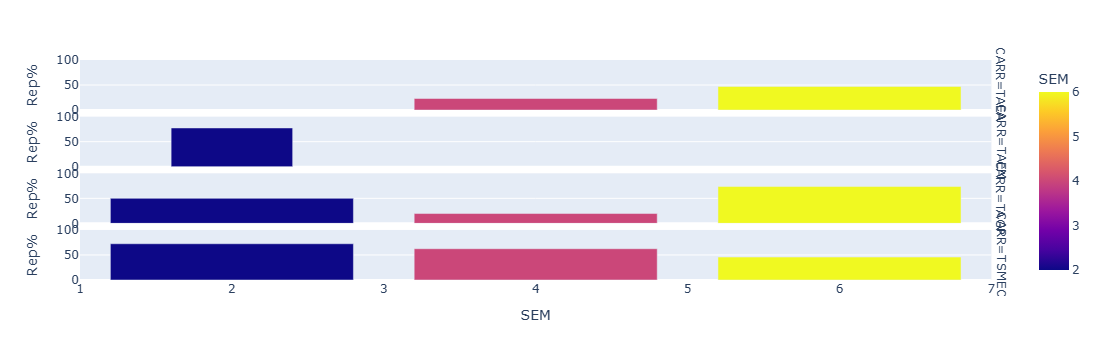

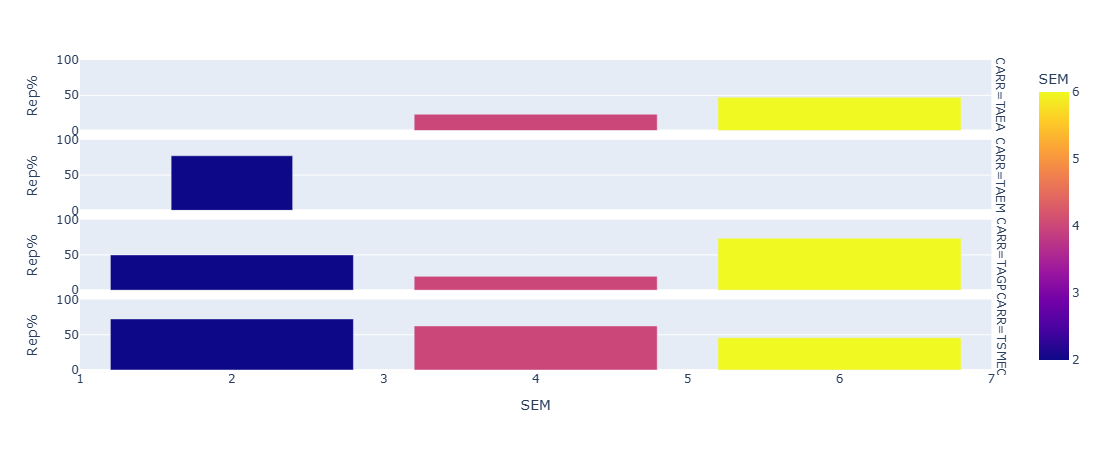

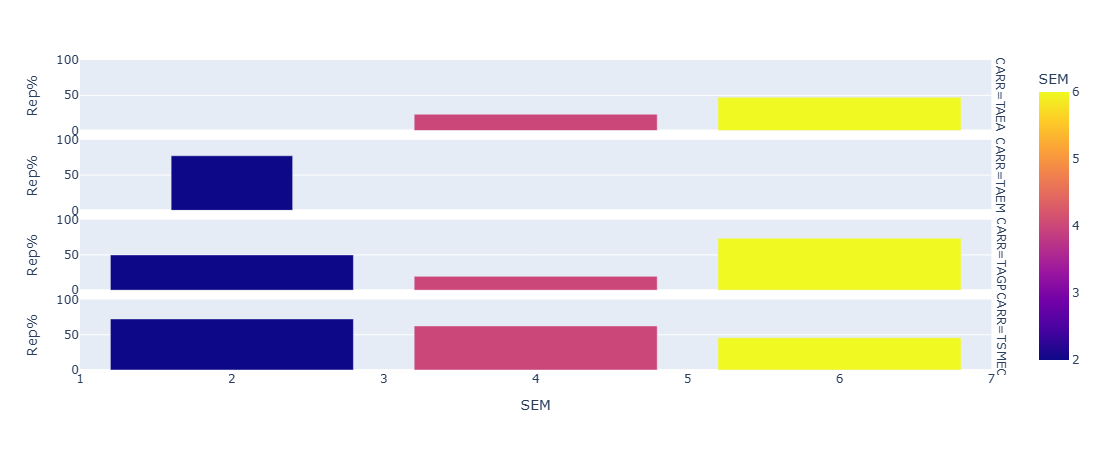

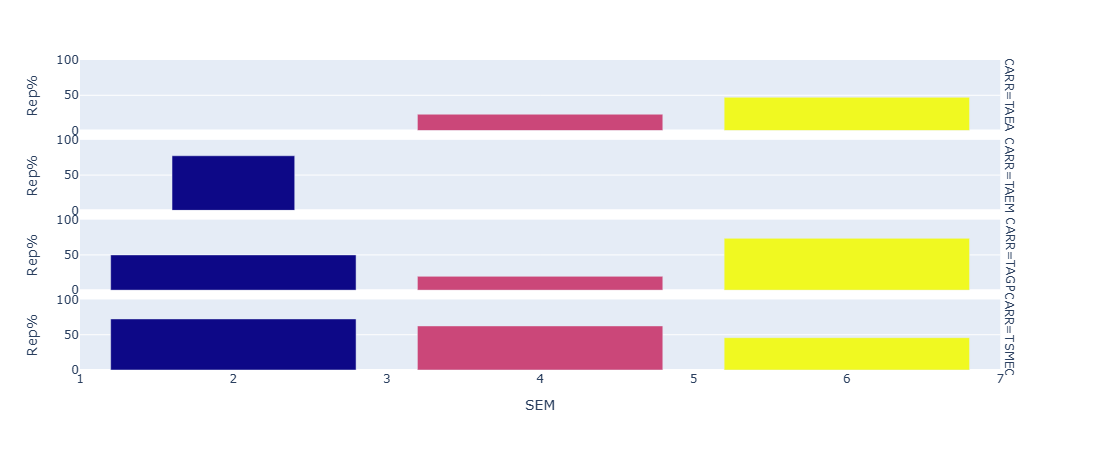

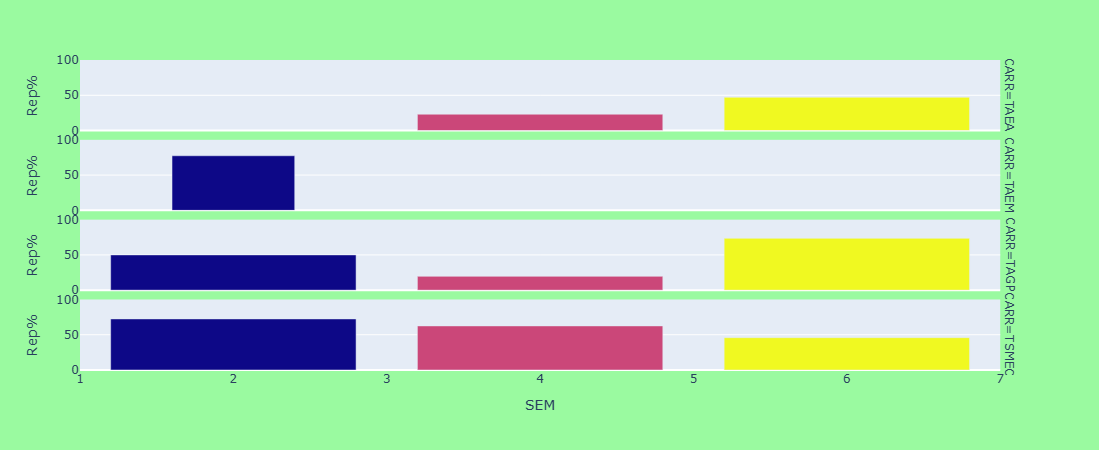

ValueError: 
    Invalid value of type 'builtins.str' received for the 'plot_bgcolor' property of layout
        Received value: 'CARR'

    The 'plot_bgcolor' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [270]:
fig2 = px.bar(tabla_reprobados, x="SEM", y="Rep%", color = "SEM", facet_row="CARR")
fig2.update_yaxes(range=[0, 100])
fig2.update_layout(width=325, height=450)
fig2.update_layout(showlegend=False)
fig2.update_coloraxes(showscale=False)
fig2.update_layout(paper_bgcolor='#9afaa0') 
fig2.update_layout(plot_bgcolor='CARR') 
fig2.update_layout(font=dict(
        family="Courier New, monospace",
        size=8,  # Set the font size here
        color="RebeccaPurple"
    )) 

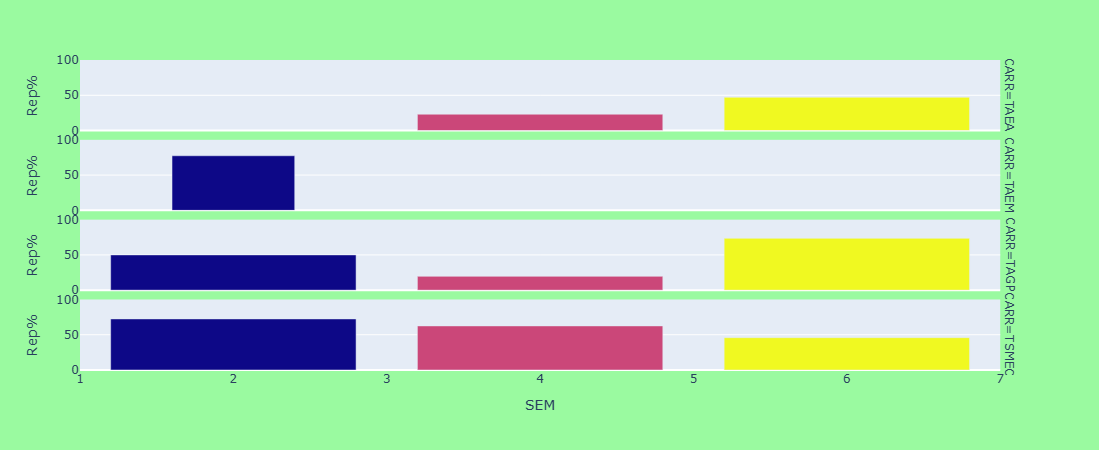

In [271]:
fig2.show()

In [272]:
apair = list()
for i,j in zip(out['CARR'], out['SEM']):
    salida = i + '-' + str(k) 
    apair.append(salida)
out['ID3'] = apair
# Hemos generado un ID para relacionar "g"

In [273]:
out = pd.merge(g, out, left_on='ID2', right_on='ID3', how='right').drop('ID2', axis=1)
out['nRepro'] = round((out.nRepro/out.nAlumnos)*100,1)
out = out.rename(columns={'SEM_y':'SEM'})


In [274]:
down =cbx.loc[cbx['PAR1']<6]

apair = list()
for i,j,k,l in zip(down['NCONT'],down['PAT'],down['MAT'], down['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
down['NOMINE']=apair

down =down.groupby(['CARR','GPO','NOMINE']).agg({'NCONT':'count'})
down=down.rename(columns={'NCONT':'CONT'})

down = down.reset_index()
down['idx']=[f"{a} {b}" for a,b in zip(down.NOMINE,down.GPO)]

C:\Users\reneb\AppData\Local\Temp\ipykernel_13564\3388487359.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [275]:


print('Número de asignaturas reprobadas por cada uno de los alumnos en reprobación.')
down2 = down.iloc[:,[0,4,3]].sort_values('CONT',ascending=False).loc[:,['idx','CARR','CONT']].sort_values('CONT',ascending=False)
down2 = down2.reset_index()
down2 = down2.rename(columns={'CONT':'Materias reprobadas'})
down2 = down2.iloc[:,[1,2,3]]
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(down2)



Número de asignaturas reprobadas por cada uno de los alumnos en reprobación.


idx   CARR  \
0               24101012050009-PALACIOS PEREZ WILLIAM JARET 2A   TAGP   
1          23101012050053-ESCOBAR HINOJOSA HASHLEY JOSELYNE 4A   TAGP   
2             23101012050043-CARRILLO PEREZ CRISTIAN DANIEL 2A   TAGP   
3              24101012050115-PAZ BALANDRAN SAORY GUADALUPE 2A  TSMEC   
4                 24101012050116-PEREZ PALACIOS ANGEL DAVID 2A   TAGP   
5                  24101012050079-GONZALEZ HERNANDEZ HECTOR 2A  TSMEC   
6                         23101012050015-LOPEZ _ LUIS ANGEL 4A   TAGP   
7            24101012050031-PAZ RODRIGUEZ ESTEFANY MILAGROS 2A  TSMEC   
8                    24101012050023-VARGAS _ NAYLEA JEREIMY 2A  TSMEC   
9             24101012050003-JIMENEZ CASTORENA EDWIN ADRIAN 2A  TSMEC   
10            22101012050093-RIVERA CASTAÑON CARLOS ALBERTO 6A   TAGP   
11              22101012050068-AVALOS ESCOBAR NANCY LIZBETH 6A  TSMEC   
12               24101012050083-LUEVANO ORTIZ DAVID RICARDO 2A  TSMEC   
13             24101012050034-PEREZ CONTRERAS ERICK JOSHUHA 2A   TAGP   
14               22101012050058-ORTIZ VALADEZ JESUS EDUARDO 6A   TAGP   
15                  21101012050062-LEYVA PAZ ALEXIS RICARDO 6A   TAGP   
16                    22101012050105-REYES _ ABRAHAM MISAEL 6A   TAGP   
17                 24101012050061-FLORES LOPEZ AARON MICHEL 2A  TSMEC   
18            24101012050103-SANTANA AMADOR ARGELIA SOLENYI 2A  TSMEC   
19                       23101012050001-ACOSTA DIAZ ABRAHAM 4A   TAGP   
20                 23101012050014-IBARRA FLORES ALAN ANDREI 4A   TAGP   
21            24101012050042-SANDOVAL LOPEZ JUANA GUADALUPE 2A  TSMEC   
22                   23101012050042-ROMO AVILA JUAN RICARDO 4A   TAGP   
23                         24101012050038-MACIAS PEREZ SAUL 2A   TAEM   
24            24101012050021-RODRIGUEZ BERNAL JOHANA LIZETH 2A  TSMEC   
25             23101012050065-SUAREZ VALENCIANO ALAN ALEXIS 4A   TAGP   
26             24101012050027-LOPEZ MARTINEZ DIEGO DE JESUS 2A  TSMEC   
27                   24101012050035-DIAZ YAÑEZ YEINA NAHOMY 2A  TSMEC   
28            24101012050050-MONTIEL VARGAS VERONICA XIMENA 2A   TAGP   
29          24101012050070-DE LUNA RODRIGUEZ JUSTIN ALBERTO 2A   TAGP   
30              23101012050104-PULIDO MENDEZ MONICA LIZBETH 4A   TAGP   
31              24101012050106-DE LA TORRE _ TRIGO DE JESUS 2A   TAGP   
32         24101012050087-AGUILAR RANGEL KIMBERLY GUADALUPE 2A   TAEM   
33             22101012050103-GURROLA MARTINEZ OSCAR DANIEL 6A   TAGP   
34            24101012050076-ORTIZ RODRIGUEZ JUAN ADALBERTO 2A  TSMEC   
35             22101012050110-CANDELAS GOMEZ KAROLL EDUARDO 6A   TAGP   
36                 24101012050029-PALACIO ORTIZ JOSE JAVIER 2A   TAEM   
37               24101012050057-REYES ESPARZA KEVIN ALBERTO 2A   TAEM   
38               24101012050033-CASTORENA SEGURA ROSA ELENA 2A   TAGP   
39                        24101012050072-REYES REYES CAMILA 2A   TAEM   
40                 22101012050074-GUTIERREZ BAEZ JOSE ANGEL 6A   TAGP   
41       24101012050104-BUENRROSTRO MORENO DANIEL ALEXANDRO 2A   TAGP   
42               22101012050030-DE LUNA VARGAS DEISY PAMELA 6A   TAGP   
43             24101012050093-HERRERA GONZALEZ ELIHU RAMSES 2A  TSMEC   
44               24101012050110-LOPEZ RUVALCABA AXEL DANIEL 2A  TSMEC   
45               22101012050051-HERNANDEZ CAMPOS JUAN RUBEN 6A  TSMEC   
46            24101012050117-DE LUNA LUEVANO CESAR SANTIAGO 2A   TAGP   
47                23101012050074-TREJO MARTINEZ ELVIS JETER 4A  TSMEC   
48              24101012050008-RAMIREZ GONZALEZ ERICK URIEL 2A   TAGP   
49                  22101012050077-ARANDA MATA DEISY NATALY 6A   TAEA   
50          22101012050037-PUENTES DE LA CRUZ VANESSA SINAI 6A   TAEA   
51                  22101012050047-GONZALEZ ORTIZ LUIS OMAR 6A  TSMEC   
52                      24101012050012-PACHECO SANTANA ALDO 2A   TAEM   
53              22101012050078-MARTINEZ GONZALEZ JOSE DAVID 6A   TAGP   
54         22101012050112-MARTINEZ ESPARZA A

In [276]:
asigna =cbx.loc[cbx['PAR1']<18]

apair = list()
for i,j,k,l in zip(asigna['NCONT'],asigna['PAT'],asigna['MAT'], asigna['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
asigna['NOMINE']=apair

asigna =asigna.groupby(['CARR','GPO','NCONT','NOMINE']).agg({'ASIG':'count'})
asigna=asigna.rename(columns={'ASIG':'ASIGS'})

asigna = asigna.reset_index()
asigna['idy']=[f"{a} {b}" for a,b in zip(asigna.NOMINE,asigna.GPO)]
#destacados['perc']=round((destacados.CONT/destacados.ASIGS)*100,1)

In [277]:
arepy = cbx.loc[(cbx['PAR1']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
asig_most_frec = arepy.groupby(['CARR','SEM'])['ASIG'].agg(lambda x: x.value_counts().idxmax())

asig_most_frec =  asig_most_frec.to_frame()
asig_most_frec = asig_most_frec.reset_index()
asig_most_frec = asig_most_frec.loc[:,['CARR','SEM','ASIG']]



asig_most_frec_count = arepy.groupby(['CARR','SEM'])['ASIG'].agg(lambda x: x.value_counts().max())
asig_most_frec_count = asig_most_frec_count.to_frame()
asig_most_frec_count = asig_most_frec_count.reset_index()
asig_most_frec_count = asig_most_frec_count.rename(columns = {'ASIG':'COUNT'})


asig_most_frec_final = pd.concat([asig_most_frec.iloc[:,[0,1,2]], asig_most_frec_count.iloc[:,[2]]], axis=1)

asig_most_frec_final

CARR  SEM       ASIG  COUNT
0   TAEA    4    RQCMFNS      3
1   TAEA    6     TEMFIL      6
2   TAEM    2  CDIGIT_II     11
3   TAGP    2     LyC II     13
4   TAGP    4    RQCMFNS      7
5   TAGP    6    PROyEST     23
6  TSMEC    2  CDIGIT_II     17
7  TSMEC    4  SOTECDIST      9
8  TSMEC    6    PROyEST      8

In [278]:
arepx = cbx.loc[(cbx['PAR1']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
by_group = arepx.groupby(['CARR','SEM','CURP','PAT','MAT','NOM'])['ASIG'].unique()
by_group =  by_group.to_frame()
by_group = by_group.reset_index()
by_group
by_group = by_group.loc[:,['CARR','SEM','PAT','MAT','NOM','ASIG']]
by_group_asigs_rep = by_group
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
    display(by_group_asigs_rep)


CARR  SEM                CURP        PAT        MAT               NOM  \
0     TAEA    4  MAMA071010HASRNNA8      MARIN    MONTOYA     ANGEL NEMESIO   
1     TAEA    4  MOER080228MASRSBA8    MORALES    ESCOBAR    RUBI ESMERALDA   
2     TAEA    4  SAEA080102HASNSBA7    SANTANA   ESCOBEDO           ABRAHAM   
3     TAEA    6  AAMD071011MASRTSA4     ARANDA       MATA      DEISY NATALY   
4     TAEA    6  COLD070223HASNVLA2  CONTRERAS    LUEVANO     DILAN MISRAIM   
..     ...  ...                 ...        ...        ...               ...   
126  TSMEC    6  LURM070529HASVDXA6    LUEVANO  RODRIGUEZ  MAXIMO GUADALUPE   
127  TSMEC    6  MECS071125MASNSFA4     MENDEZ  CASTORENA   SOFIA GUADALUPE   
128  TSMEC    6  NIST070515MASCCNA8    NICOLAS    SAUCEDO     TANIA PAULINA   
129  TSMEC    6  ROGK071017HASMRRA3     ROMERO     GARCIA   KAROL ALEJANDRO   
130  TSMEC    6  VASK070324MASRCRA8     VARGAS    SAUCEDO  KAROL MONTSERRAT   

                                 ASIG  
0                           [RQCMFNS]  
1                           [RQCMFNS]  
2    [SELECTMAT_I, RQCMFNS, CNHIST_1]  
3        [PROyEST, PMERCALNZ, TEMFIL]  
4                            [TEMFIL]  
..                                ...  
126                       [TBIOLCONT]  
127                         [PROyEST]  
128                         [PROyEST]  
129                 [PROyEST, TEMFIL]  
130                         [PROyEST]  

[131 rows x 7 columns]

CARR  SEM          PAT         MAT                   NOM  \
0     TAEA    4        MARIN     MONTOYA         ANGEL NEMESIO   
1     TAEA    4      MORALES     ESCOBAR        RUBI ESMERALDA   
2     TAEA    4      SANTANA    ESCOBEDO               ABRAHAM   
3     TAEA    6       ARANDA        MATA          DEISY NATALY   
4     TAEA    6    CONTRERAS     LUEVANO         DILAN MISRAIM   
5     TAEA    6       FLORES     ROSALES      OREANDY SANJUANA   
6     TAEA    6     GONZALEZ       PEREZ      JOVANI ALEJANDRO   
7     TAEA    6    HERNANDEZ     PADILLA        DIANA CAROLINA   
8     TAEA    6       MENDEZ   CASTORENA        CRUZ NALLIBETL   
9     TAEA    6        MUÑOZ        ROMO           LAURA PAOLA   
10    TAEA    6      PUENTES  DE LA CRUZ         VANESSA SINAI   
11    TAEM    2      AGUILAR      RANGEL    KIMBERLY GUADALUPE   
12    TAEM    2         BAEZ      FLORES      EMILY JACQUELINE   
13    TAEM    2    CASTORENA        DIAZ      CAMILA MONSERRAT   
14    TAEM    2    CASTAÑEDA     ESPARZA     ESMERALDA YAJAIRA   
15    TAEM    2       GARCIA     MEDRANO         RICARDO RUBEN   
16    TAEM    2    HERNANDEZ      CARANO          NANCY ARIANA   
17    TAEM    2    HERNANDEZ     MONTOYA      EVELYN ALEXANDRA   
18    TAEM    2      HERRERA           _       HEIDY GUADALUPE   
19    TAEM    2       HINOJO    ESCOBEDO            A. B JACOB   
20    TAEM    2      DE LUNA     NEGRETE         YOSTIN DEMIAN   
21    TAEM    2      MARQUEZ     ESPARZA      RICARDO DE JESUS   
22    TAEM    2       MACIAS    GONZALEZ        BRANDON JOSHUE   
23    TAEM    2       MACIAS       PEREZ                  SAUL   
24    TAEM    2       MORENO        ROMO                 URIEL   
25    TAEM    2         MURO   HERNANDEZ      XIMENA GUADALUPE   
26    TAEM    2         MATA       MUÑOS         EDWIN ANTONIO   
27    TAEM    2       ORTEGA    GONZALEZ     ADILENE GUADALUPE   
28    TAEM    2      PALACIO       ORTIZ           JOSE JAVIER   
29    TAEM    2      PACHECO     SANTANA                  ALDO   
30    TAEM    2        REYES     ESPARZA         KEVIN ALBERTO   
31    TAEM    2        REYES       REYES                CAMILA   
32    TAEM    2    RODRIGUEZ    RENTERIA             ALEX IVAN   
33    TAEM    2         ROMO           _           MARLY ITZEL   
34    TAEM    2      SERRANO     VAZQUEZ         ALEXA CANDELA   
35    TAGP    2  BUENRROSTRO      MORENO      DANIEL ALEXANDRO   
36    TAGP    2     CARRILLO       PEREZ       CRISTIAN DANIEL   
37    TAGP    2    CASTORENA      SEGURA            ROSA ELENA   
38    TAGP    2     GUERRERO      ACOSTA       CARMEN SAMANTHA   
39    TAGP    2      HERRERA  VALENCIANO  MONTSERRAT GUADALUPE   
40    TAGP    2      DE LUNA     LUEVANO        CESAR SANTIAGO   
41    TAGP    2      DE LUNA   RODRIGUEZ        JUSTIN ALBERTO   
42    TAGP    2        MARIN           _            ZAIN KALEB   
43    TAGP    2       MEDINA   GUTIERREZ           DULCE MARIA   
44    TAGP    2      MERCADO      VARGAS              MARIJOSE   
45    TAGP    2      MONTIEL      VARGAS       VERONICA XIMENA   
46    TAGP    2     PALACIOS       PEREZ         WILLIAM JARET   
47    TAGP    2        PEREZ   CONTRERAS         ERICK JOSHUHA   
48    TAGP    2        PEREZ     CANALES          LITZY NAYELI   
49    TAGP    2        PEREZ    PALACIOS           ANGEL DAVID   
50    TAGP    2      RAMIREZ    GONZALEZ           ERICK URIEL   
51    TAGP    2  DE SANTIAGO   ZAMARRIPA     KIRSSEN AMEYATZIN   
52    TAGP    2  DE LA TORRE           _        TRIGO DE JESUS   
53    TAGP    4       ACOSTA        DIAZ               ABRAHAM   
54    TAGP    4    CASTORENA        MATA     RICARDO ALEXANDER   
55    TAGP    4      ESCOBAR    HINOJOSA      HASHLEY JOSELYNE   
56    TAGP    4       GALVAN     LAZARIN       ZENAIDA YULIANA   
57    TAGP    4     GUERRERO        SOTO        ALONDRA ESTHER   
58    TAGP    4     GUERRERO        SOTO               CELESTE   
59    TAGP    4       IBARRA      FLORES      

In [279]:
# CANTIDAD DE ALUMNOS CON REGISTRO DE CALIFICACIÓN EN CByP USANDO XLSX PARCIAL 2

matricula = len(cbx['NCONT'].unique())
matricula

256

<h1 style="color:red;">ALUMNOS EN RIESGO</h1>

In [280]:
meet = pd.merge(down, asigna, left_on='idx', right_on='idy', how='left').drop('idy', axis=1)

meet['%'] = round((meet.CONT/meet.ASIGS)*100,1)
meet['Ratio'] = meet['CONT'].map(str) + '/' + meet['ASIGS'].map(str)
meet = meet.rename(columns={'NOMINE_y':'NOMINE'})
meet =meet.loc[meet['%']>40].sort_values(['%'],ascending=False)
meet = meet.reset_index()

alumnos_en_riesgo = meet.loc[:,['idx','%','Ratio']]
alumnos_en_riesgo = alumnos_en_riesgo.rename(columns={'idx':'NOM'})
en_riesgo = len(alumnos_en_riesgo)
en_riesgo

print('Hay 57 alumnos con más del 40% de sus asignaturas reprobadas. Por ejemplo: AVALOS ESCOBAR NANCY LIZBETH reprobó 6 de las 6 materias que cursa, es decir, reprobó el 100% de sus asignaturas. Para fines de este documento, llamaremos a estos alumnos "Alumnos rezagados".')

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):  # more options can be specified also
     display(alumnos_en_riesgo)



57

Hay 57 alumnos con más del 40% de sus asignaturas reprobadas. Por ejemplo: AVALOS ESCOBAR NANCY LIZBETH reprobó 6 de las 6 materias que cursa, es decir, reprobó el 100% de sus asignaturas. Para fines de este documento, llamaremos a estos alumnos "Alumnos rezagados".


NOM      % Ratio
0          22101012050068-AVALOS ESCOBAR NANCY LIZBETH 6A  100.0   6/6
1        23101012050043-CARRILLO PEREZ CRISTIAN DANIEL 2A  100.0   8/8
2              21101012050062-LEYVA PAZ ALEXIS RICARDO 6A  100.0   6/6
3           22101012050058-ORTIZ VALADEZ JESUS EDUARDO 6A  100.0   6/6
4        22101012050093-RIVERA CASTAÑON CARLOS ALBERTO 6A  100.0   6/6
5                22101012050105-REYES _ ABRAHAM MISAEL 6A  100.0   6/6
6          24101012050009-PALACIOS PEREZ WILLIAM JARET 2A  100.0   9/9
7         23101012050079-RAMIREZ VALADEZ LUIS FERNANDO 2A  100.0   1/1
8         24101012050115-PAZ BALANDRAN SAORY GUADALUPE 2A  100.0   8/8
9     23101012050053-ESCOBAR HINOJOSA HASHLEY JOSELYNE 4A  100.0   8/8
10           24101012050116-PEREZ PALACIOS ANGEL DAVID 2A   88.9   8/9
11              24101012050023-VARGAS _ NAYLEA JEREIMY 2A   87.5   7/8
12       24101012050003-JIMENEZ CASTORENA EDWIN ADRIAN 2A   87.5   7/8
13      24101012050031-PAZ RODRIGUEZ ESTEFANY MILAGROS 2A   87.5   7/8
14            24101012050079-GONZALEZ HERNANDEZ HECTOR 2A   87.5   7/8
15                   23101012050015-LOPEZ _ LUIS ANGEL 4A   87.5   7/8
16          24101012050083-LUEVANO ORTIZ DAVID RICARDO 2A   75.0   6/8
17         23101012050104-PULIDO MENDEZ MONICA LIZBETH 4A   71.4   5/7
18        22101012050110-CANDELAS GOMEZ KAROLL EDUARDO 6A   66.7   4/6
19        22101012050103-GURROLA MARTINEZ OSCAR DANIEL 6A   66.7   4/6
20          22101012050030-DE LUNA VARGAS DEISY PAMELA 6A   66.7   4/6
21            22101012050074-GUTIERREZ BAEZ JOSE ANGEL 6A   66.7   4/6
22        24101012050034-PEREZ CONTRERAS ERICK JOSHUHA 2A   66.7   6/9
23        23101012050065-SUAREZ VALENCIANO ALAN ALEXIS 4A   62.5   5/8
24       24101012050103-SANTANA AMADOR ARGELIA SOLENYI 2A   62.5   5/8
25                    24101012050038-MACIAS PEREZ SAUL 2A   62.5   5/8
26            24101012050061-FLORES LOPEZ AARON MICHEL 2A   62.5   5/8
27       24101012050042-SANDOVAL LOPEZ JUANA GUADALUPE 2A   62.5   5/8
28              24101012050035-DIAZ YAÑEZ YEINA NAHOMY 2A   62.5   5/8
29        24101012050027-LOPEZ MARTINEZ DIEGO DE JESUS 2A   62.5   5/8
30              23101012050042-ROMO AVILA JUAN RICARDO 4A   62.5   5/8
31       24101012050021-RODRIGUEZ BERNAL JOHANA LIZETH 2A   62.5   5/8
32    24101012050087-AGUILAR RANGEL KIMBERLY GUADALUPE 2A   62.5   5/8
33            23101012050014-IBARRA FLORES ALAN ANDREI 4A   62.5   5/8
34                  23101012050001-ACOSTA DIAZ ABRAHAM 4A   62.5   5/8
35       24101012050050-MONTIEL VARGAS VERONICA XIMENA 2A   55.6   5/9
36     24101012050070-DE LUNA RODRIGUEZ JUSTIN ALBERTO 2A   55.6   5/9
37         24101012050106-DE LA TORRE _ TRIGO DE JESUS 2A   55.6   5/9
38          24101012050057-REYES ESPARZA KEVIN ALBERTO 2A   50.0   4/8
39          22101012050051-HERNANDEZ CAMPOS JUAN RUBEN 6A   50.0   3/6
40             22101012050047-GONZALEZ ORTIZ LUIS OMAR 6A   50.0   3/6
41            24101012050029-PALACIO ORTIZ JOSE JAVIER 2A   50.0   4/8
42          24101012050110-LOPEZ RUVALCABA AXEL DANIEL 2A   50.0   4/8
43         22101012050008-HERNANDEZ GARCIA JOSE MANUEL 6A   50.0   3/6
44        24101012050093-HERRERA GONZALEZ ELIHU RAMSES 2A   50.0   4/8
45       24101012050076-ORTIZ RODRIGUEZ JUAN ADALBERTO 2A   50.0   4/8
46    22101012050112-MARTINEZ ESPARZA ANDREA ESTEFANIA 6A   50.0   3/6
47          22101012050063-ALVARADO RUIZ JURITZY ANAHY 6A   50.0   3/6
48             22101012050077-ARANDA MATA DEISY NATALY 6A   50.0   3/6
49                   24101012050072-REYES REYES CAMILA 2A   50.0   4/8
50         22101012050078-MARTINEZ GONZALEZ JOSE DAVID 6A   50.0   3/6
51   23101012050034-PADILLA ESQUEDA ANDERSON ALEXANDER 2A   50.0   3/6
52     22101012050037-PUENTES DE LA CRUZ VANESSA SINAI 6A   50.0   3/6
53  24101012050104-BUENRROSTRO MORENO DANIEL ALEXANDRO 2A   44.4   4/9
54          24101012050033-CASTORENA SEGURA ROSA ELENA 2A   44.4   4/9
55        23101012050033-MACIAS PADILLA ERICK FERNANDO 4A   42.9   3/7
56     

In [281]:
todas = len(alumnos_en_riesgo[alumnos_en_riesgo['%']== 100])

In [282]:
riesgo_perc= round((en_riesgo/matricula)*100,2)
riesgo_perc

22.27

In [283]:


arep1 = cbx.loc[(cbx['PAR1']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','SEM','GPO','PAT','MAT','NOM'])['CURP'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'CURP':'nCasos'})
arep1=arep1.sort_values(['nCasos'],ascending=False)
arep1 = arep1.reset_index()
arep1 = arep1.iloc[:,[1,2,3,4,5,6,7]]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(arep1)



CARR  SEM GPO          PAT         MAT                   NOM  nCasos
0     TAGP    2  2A     PALACIOS       PEREZ         WILLIAM JARET       9
1     TAGP    2  2A        PEREZ    PALACIOS           ANGEL DAVID       8
2     TAGP    4  4A      ESCOBAR    HINOJOSA      HASHLEY JOSELYNE       8
3    TSMEC    2  2A          PAZ   BALANDRAN       SAORY GUADALUPE       8
4     TAGP    2  2A     CARRILLO       PEREZ       CRISTIAN DANIEL       8
5    TSMEC    2  2A      JIMENEZ   CASTORENA          EDWIN ADRIAN       7
6    TSMEC    2  2A       VARGAS           _        NAYLEA JEREIMY       7
7    TSMEC    2  2A     GONZALEZ   HERNANDEZ                HECTOR       7
8     TAGP    4  4A        LOPEZ           _            LUIS ANGEL       7
9    TSMEC    2  2A          PAZ   RODRIGUEZ     ESTEFANY MILAGROS       7
10    TAGP    6  6A        LEYVA         PAZ        ALEXIS RICARDO       6
11    TAGP    6  6A       RIVERA    CASTAÑON        CARLOS ALBERTO       6
12    TAGP    6  6A        REYES           _        ABRAHAM MISAEL       6
13   TSMEC    2  2A      LUEVANO       ORTIZ         DAVID RICARDO       6
14    TAGP    6  6A        ORTIZ     VALADEZ         JESUS EDUARDO       6
15    TAGP    2  2A        PEREZ   CONTRERAS         ERICK JOSHUHA       6
16   TSMEC    6  6A       AVALOS     ESCOBAR         NANCY LIZBETH       6
17   TSMEC    2  2A        LOPEZ    MARTINEZ        DIEGO DE JESUS       5
18    TAGP    4  4A       PULIDO      MENDEZ        MONICA LIZBETH       5
19    TAGP    4  4A         ROMO       AVILA          JUAN RICARDO       5
20    TAGP    4  4A       SUAREZ  VALENCIANO           ALAN ALEXIS       5
21    TAGP    2  2A      DE LUNA   RODRIGUEZ        JUSTIN ALBERTO       5
22    TAGP    2  2A  DE LA TORRE           _        TRIGO DE JESUS       5
23    TAGP    2  2A      MONTIEL      VARGAS       VERONICA XIMENA       5
24   TSMEC    2  2A    RODRIGUEZ      BERNAL         JOHANA LIZETH       5
25    TAEM    2  2A       MACIAS       PEREZ                  SAUL       5
26    TAGP    4  4A       ACOSTA        DIAZ               ABRAHAM       5
27    TAEM    2  2A      AGUILAR      RANGEL    KIMBERLY GUADALUPE       5
28   TSMEC    2  2A     SANDOVAL       LOPEZ       JUANA GUADALUPE       5
29   TSMEC    2  2A       FLORES       LOPEZ          AARON MICHEL       5
30   TSMEC    2  2A         DIAZ       YAÑEZ          YEINA NAHOMY       5
31   TSMEC    2  2A      SANTANA      AMADOR       ARGELIA SOLENYI       5
32    TAGP    4  4A       IBARRA      FLORES           ALAN ANDREI       5
33   TSMEC    2  2A        ORTIZ   RODRIGUEZ        JUAN ADALBERTO       4
34   TSMEC    2  2A        LOPEZ   RUVALCABA           AXEL DANIEL       4
35    TAGP    2  2A    CASTORENA      SEGURA            ROSA ELENA       4
36    TAGP    2  2A  BUENRROSTRO      MORENO      DANIEL ALEXANDRO       4
37   TSMEC    2  2A      HERRERA    GONZALEZ          ELIHU RAMSES       4
38    TAGP    6  6A     CANDELAS       GOMEZ        KAROLL EDUARDO       4
39    TAGP    6  6A      DE LUNA      VARGAS          DEISY PAMELA       4
40    TAEM    2  2A        REYES       REYES                CAMILA       4
41    TAEM    2  2A        REYES     ESPARZA         KEVIN ALBERTO       4
42    TAEM    2  2A      PALACIO       ORTIZ           JOSE JAVIER       4
43    TAGP    6  6A      GURROLA    MARTINEZ          OSCAR DANIEL       4
44    TAGP    6  6A    GUTIERREZ        BAEZ            JOSE ANGEL       4
45    TAGP    2  2A      RAMIREZ    GONZALEZ           ERICK URIEL       3
46    TAGP    6  6A     ALVARADO        RUIZ         JURITZY ANAHY       3
47   TSMEC    4  4A       MACIAS     PADILLA        ERICK FERNANDO       3
48    TAGP    6  6A     MARTINEZ     ESPARZA      ANDREA ESTEFANIA       3
49    TAGP    6  6A     MARTINEZ    GONZALEZ            JOSE DAVID       3
50   TSMEC    2  2A      PADILLA     ESQUEDA    ANDERSON ALEXANDER       3
51    TAGP    6  6A    HERNANDEZ      GARCIA           JOSE MANUEL       3
52   TSMEC    2  2A         ROM

In [284]:
arep1 = cbx.loc[(cbx['PAR1']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','GPO','SEM','PAT','MAT','NOM'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(arep1.sort_values(['CARR','SEM','GPO','PAT']))

In [285]:
apair = list()
for i,j,k in zip(arep1['CARR'],arep1['GPO'], arep1['SEM']):
    salida = i + '-' + str(k) + '-' + j
    apair.append(salida)
arep1['ID2']=apair
# Hemos generado un ID para "arep1"

In [286]:
# Relacionaremos "a" con "arep1" a través de sus ID's
# calcularemos el % reprobación por semestre

#arep2 = pd.concat([a, arep1],axis=1, join = 'inner')
arep2 = pd.merge(a, arep1, left_on='ID0', right_on='ID2', how='right').drop('ID0', axis=1)
arep2['REP_SEM'] = round((arep2.nCasos/arep2.nAlumnos)*100,1)
arep2 = arep2.rename(columns={'SEM_y':'SEM'})


In [287]:
arep2 = arep2.rename(columns={'CARR_x':'CARR','GPO_y':'GPO'})
arep2.drop(['CARR_y','GPO_x','SEM_x'], inplace=True,axis=1)

In [288]:
# Extraer todas las calificaciones reprobatorias de n-2024 y agrupar por asignatura

arep1b = cbx.loc[(cbx['PAR1']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1b = arep1b.groupby(['CARR','GPO','SEM','ASIG'])['NCONT'].nunique()
arep1b = arep1b.reset_index()
arep1b=arep1b.rename(columns={'NCONT':'nCasos'})

In [289]:
apair = list()
for i,j,k,l in zip(arep1b['CARR'],arep1b['GPO'], arep1b['SEM'], arep1b['ASIG']):
    salida = i + '-' + str(k) + '-' +j + '-' + l
    apair.append(salida)
arep1b['ID3']=apair

# Hemos generado in ID para arep1b

In [290]:
# Relacionaremoso "b" con "arep1b" a través de sus campos ID's
# obtendremos el % de reprobación por asignatura

arep2b = pd.merge(b, arep1b, left_on='ID1', right_on='ID3', how='right').drop('ID1', axis=1)
arep2b['REP_ASIG'] = round((arep2b.nCasos/arep2b.nAlumnos)*100,1)
arep2b = arep2b.rename(columns={'SEM_y':'SEM'})
arep2b = arep2b.rename(columns={'CARR_x':'CARR','GPO_y':'GPO','ASIG_x':'ASIG'})
arep2b.drop(['CARR_y','GPO_x','SEM_x','ASIG_y'], inplace=True,axis=1)

In [291]:
cbx.columns

Index(['PLANTEL', 'CARR', 'GEN', 'TURNO', 'SEM', 'GPO', 'NCONT', 'NOM', 'PAT',
       'MAT', 'CURP', 'ASIG', 'DOC', 'RFCDOC', 'PAR1', 'PAR2', 'PAR3', 'CALIF',
       'AS1', 'AS2', 'AS3', 'PERIODO', 'SEX'],
      dtype='object')

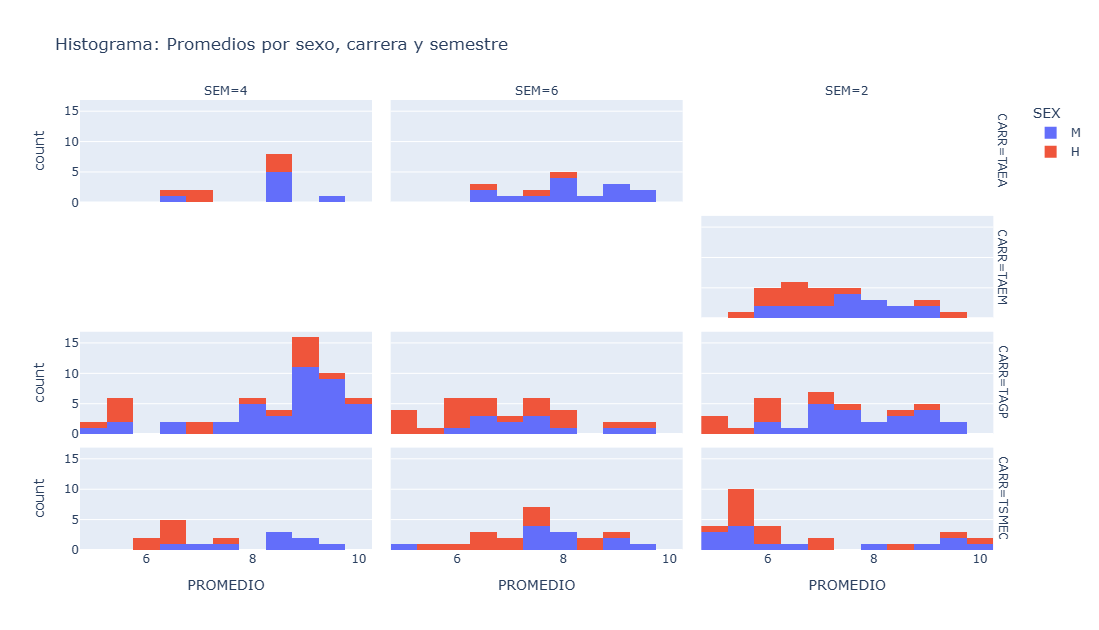

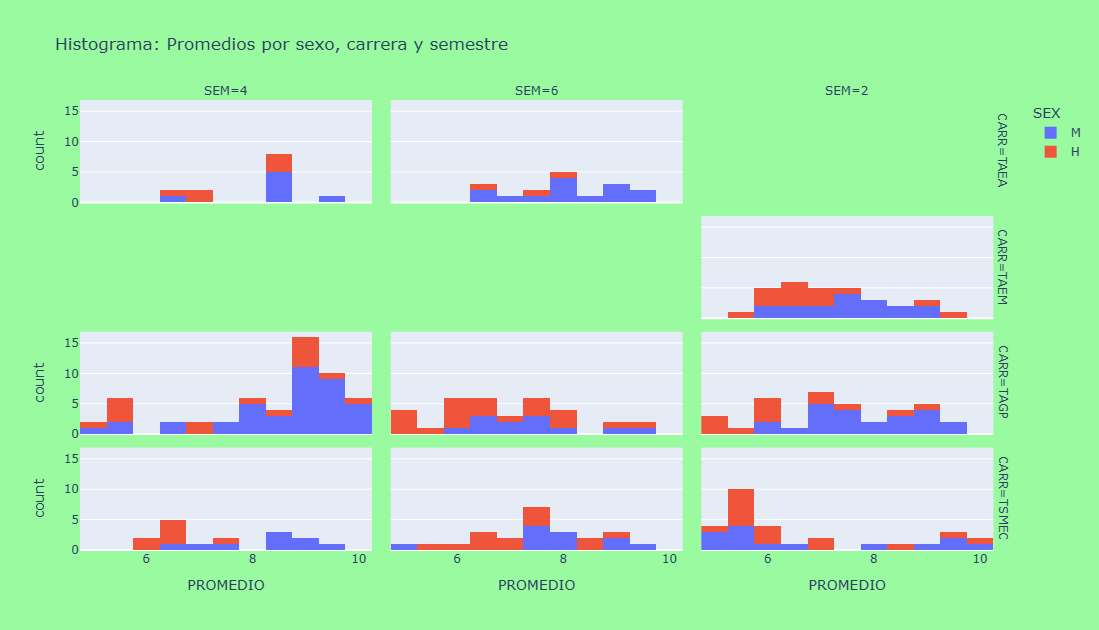

In [292]:
# HISTOGRAMA DE PROMEDIO POR CARRERA SEPARADO POR SEXO
cbx_par1 = cbx.groupby(['CARR','SEM','CURP','SEX'])['PAR1'].agg(['mean'])
cbx_par1 = cbx_par1.reset_index()
cbx_par1 = cbx_par1.rename(columns={'mean':'PROMEDIO'})

fig3 = px.histogram(cbx_par1, x="PROMEDIO", color="SEX", marginal="rug", facet_row = "CARR", facet_col = "SEM",
                   labels={'x':'PROMEDIO', 'y':'N° ALUMNOS'}, title="Histograma:\nPromedios por sexo, carrera y semestre")
fig3.update_layout(width=480, height=630)
fig3.update_layout(paper_bgcolor='#9afaa0')

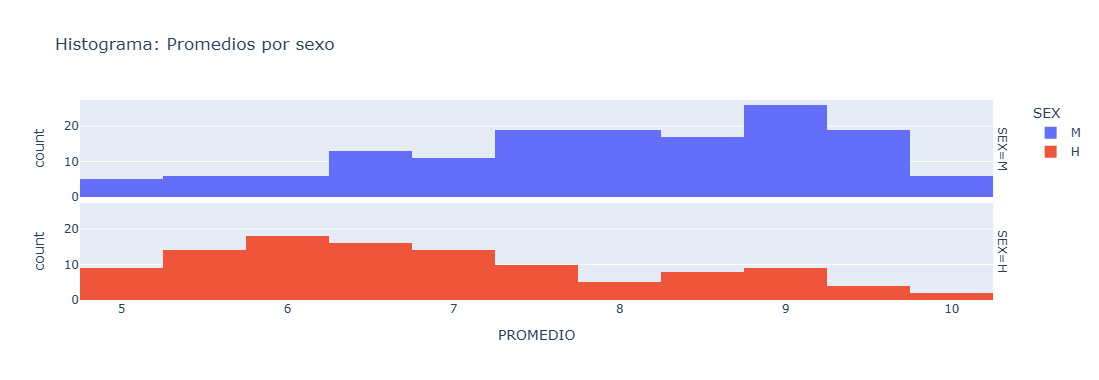

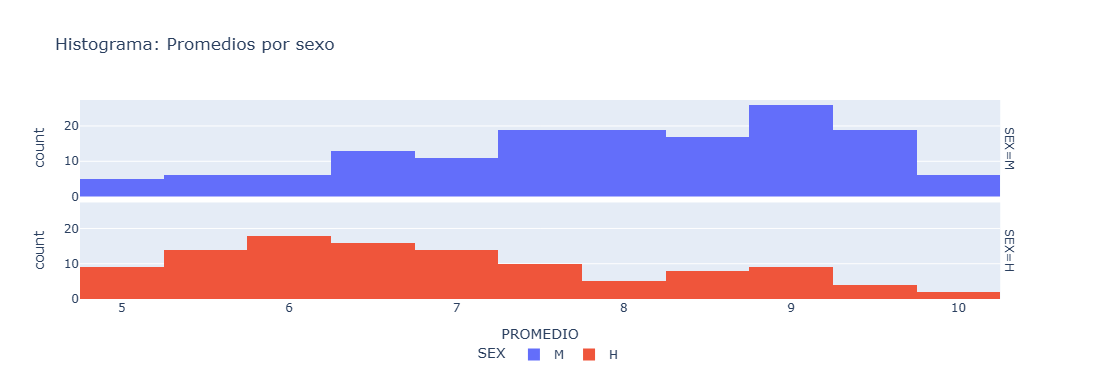

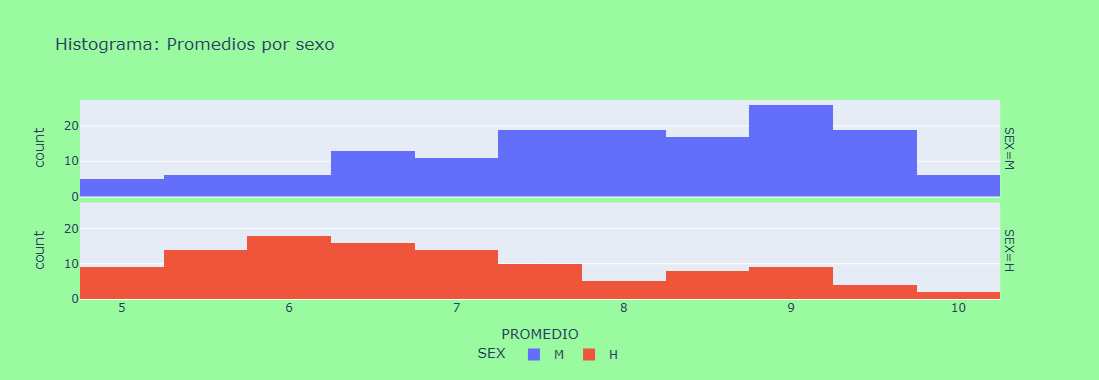

IndexError: single positional indexer is out-of-bounds

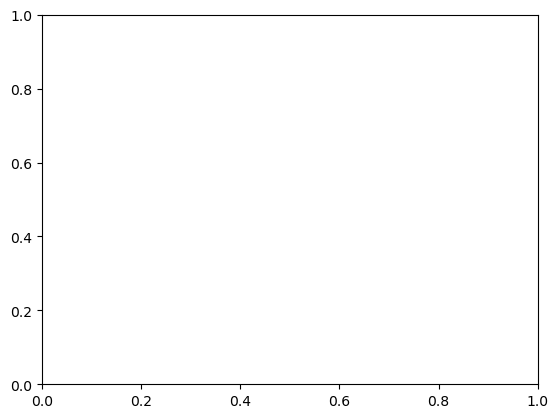

In [293]:
# HISTOGRAMA DE PROMEDIO GENERAL SEPARADO POR SEXO
cbx_par1 = cbx.groupby(['CARR','SEM','CURP','SEX'])['PAR1'].agg(['mean'])
cbx_par1 = cbx_par1.reset_index()
cbx_par1 = cbx_par1.rename(columns={'mean':'PROMEDIO'})

fig3 = px.histogram(cbx_par1, x="PROMEDIO", color="SEX", marginal="rug", facet_row = "SEX",
                   labels={'x':'PROMEDIO', 'y':'N° ALUMNOS'}, title="Histograma:\nPromedios por sexo")
fig3.update_layout(width=293, height=380)
fig3.update_layout(legend=dict(orientation="h", yanchor="top", y=-0.2, xanchor="center", x=0.5))
fig3.update_layout(paper_bgcolor='#9afaa0')




# plot:
fig, ax = plt.subplots()

ax.hist(cbx_par1.iloc[:,5], bins=5, linewidth=0.5, edgecolor="white", color="SEX")

ax.set(xlim=(4, 11), xticks=np.arange(4, 11))

plt.show()


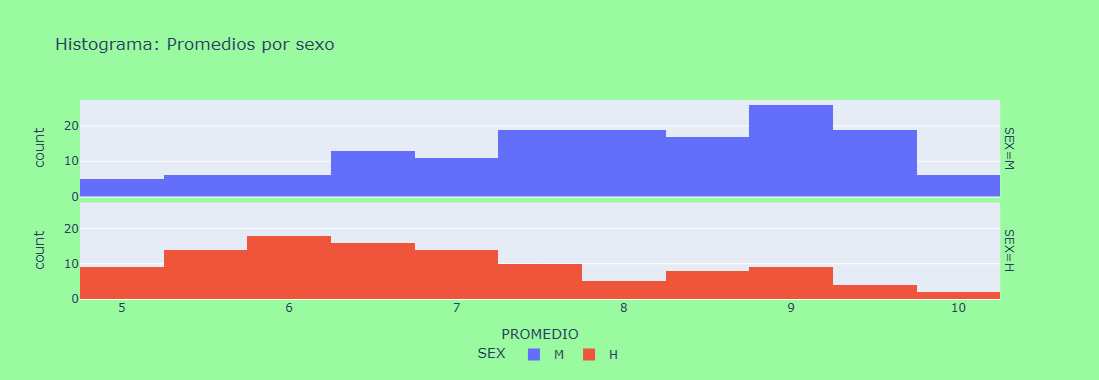

In [294]:
fig3.show()

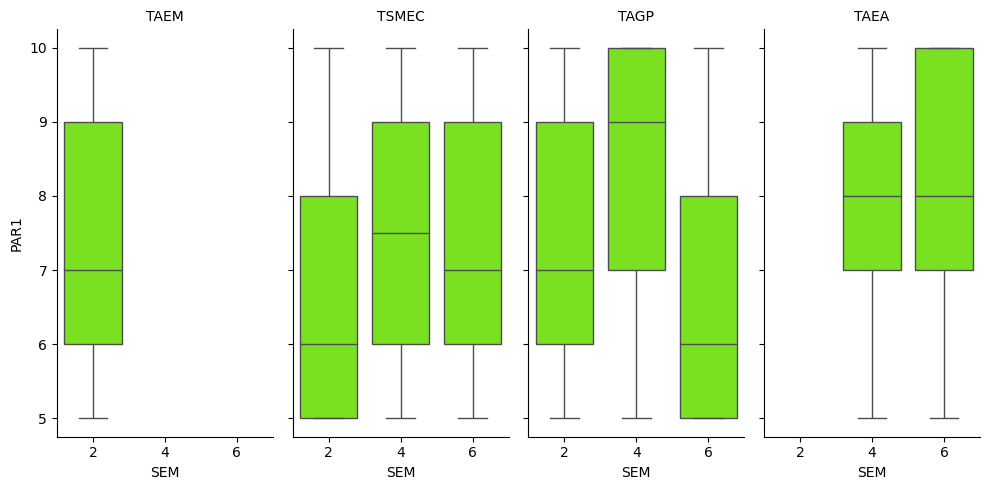

In [295]:
#de la base de datos inicial solo vamos a extraer lo correspondiente a 2-2024 y plotear
# el comportamiento de las calificaciones registradas --Distribución General de Calificaciones-- 
# por carrera y semestre

cbx_2024 = cbx.loc[cbx['PERIODO']== 'SEMESTRAL 2 - 2024'].sort_values('GPO')
g = sns.FacetGrid(cbx_2024, col = 'CARR',height=5,aspect=0.5)
g.map_dataframe(sns.boxplot, x='SEM', y ='PAR1', color='#76FF03')
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g

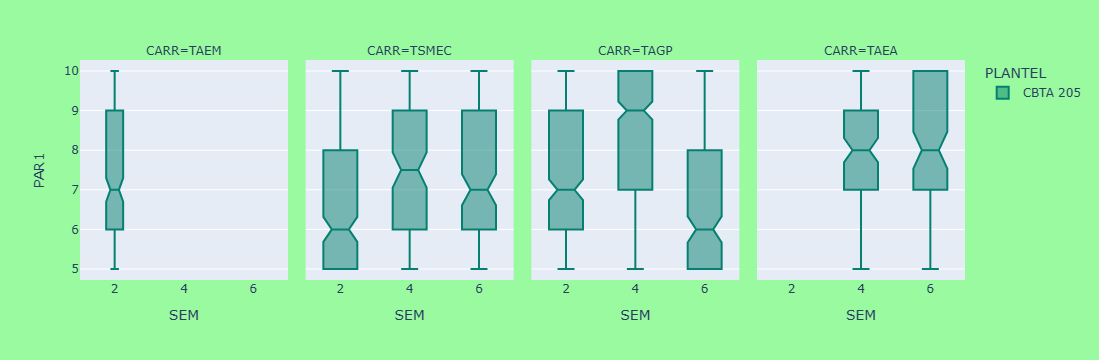

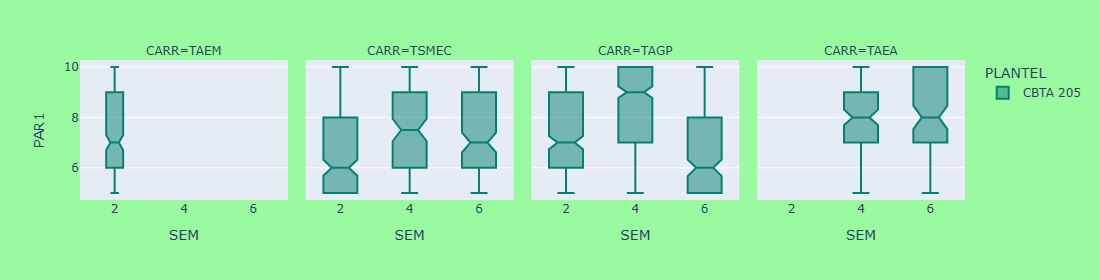

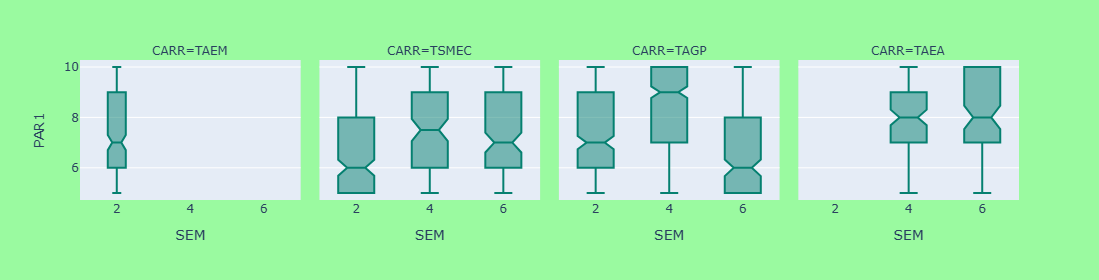

In [296]:

g1 = px.box(cbx_2024, x="SEM", y="PAR1", facet_col='CARR',
          notched=True, color = 'PLANTEL', points="outliers",
          color_discrete_map = {"CBTA 205": "#058070"})
g1.update_layout(paper_bgcolor='#9afaa0') 
g1.update_layout(height=280)
g1.update_layout(showlegend=False) 

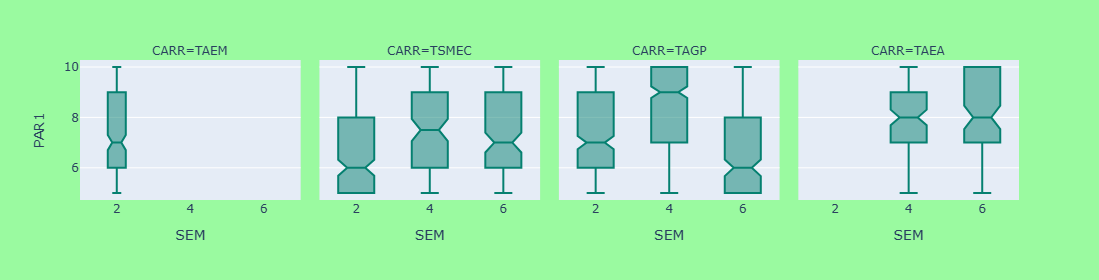

In [297]:
g1.show()

<h1 style="color:red;">MATRICULA</h1>

In [298]:
# CANTIDAD DE ALUMNOS CON REGISTRO DE CALIFICACIÓN EN CByP USANDO XLSX PARCIAL 2

matricula = len(cbx['NCONT'].unique())
matricula

256

In [299]:
signed_calif = cbx.groupby(['CARR'])['NCONT'].nunique()
signed_calif=signed_calif.reset_index()
print(signed_calif)
signed_calif2 = signed_calif['NCONT'].agg({'sum'})
print(" ")
print("Total de alumnos con calificación en carreras: ",signed_calif2)

    CARR  NCONT
0   TAEA     30
1   TAEM     31
2   TAGP    126
3  TSMEC     69
 
Total de alumnos con calificación en carreras:  sum    256
Name: NCONT, dtype: int64


In [300]:
mat_por_carrera = signed_calif
mat_por_carrera

CARR  NCONT
0   TAEA     30
1   TAEM     31
2   TAGP    126
3  TSMEC     69

In [301]:
signed_califx = cbx.groupby(['SEM','CARR'])['NCONT'].nunique()
signed_califx=signed_califx.reset_index()
signed_calif3 = signed_califx['NCONT'].agg({'sum'})
signed_califx = signed_califx.rename(columns={'NCONT':'MATRICULA'})
print(signed_califx)

print(" ")
print("Total de alumnos con calificación en carreras: ",signed_calif3)

mat_por_gpo = signed_califx
mat_por_gpo

   SEM   CARR  MATRICULA
0    2   TAEM         31
1    2   TAGP         36
2    2  TSMEC         29
3    4   TAEA         13
4    4   TAGP         56
5    4  TSMEC         16
6    6   TAEA         17
7    6   TAGP         34
8    6  TSMEC         24
 
Total de alumnos con calificación en carreras:  sum    256
Name: NCONT, dtype: int64


SEM   CARR  MATRICULA
0    2   TAEM         31
1    2   TAGP         36
2    2  TSMEC         29
3    4   TAEA         13
4    4   TAGP         56
5    4  TSMEC         16
6    6   TAEA         17
7    6   TAGP         34
8    6  TSMEC         24

<h1 style="color:red;">REPROBADOS</h1>

In [302]:
repro = cbx.loc[(cbx['PAR1']<=5) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
repro = repro.groupby(['CARR','SEM','GPO','PAT','MAT','NOM'])['CURP'].count()
cont_reprobados = len(repro)
cont_reprobados

131

In [303]:
reprobados = cbx.loc[(cbx['PAR1']<=5) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]['NCONT'].nunique()

reprobados

131

In [304]:

reprobados =cbx.loc[cbx['PAR1']<6].groupby(['CARR','GPO','SEM','NCONT']).agg({'NCONT':'count'})
reprobados=reprobados.rename(columns={'NCONT':'CONT'})
reprobados = reprobados.reset_index()
len(reprobados)

131

In [305]:
reprobados =cbx.loc[cbx['PAR1']<6].groupby(['CARR','GPO','NCONT']).agg({'NCONT':'count'})
reprobados=reprobados.rename(columns={'NCONT':'CONT'})
reprobados = reprobados.reset_index()
len(reprobados)

131

In [306]:
print("El total de alumnos con alguna calificación reprobatoria: ", len(reprobados))

El total de alumnos con alguna calificación reprobatoria:  131


In [307]:
repro_perc = round((len(reprobados)/signed_calif3)*100,2)
repro_perc = repro_perc[0]
repro_perc

C:\Users\reneb\AppData\Local\Temp\ipykernel_13564\2162666714.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



51.17

In [308]:
#PARCIAL 1
print("El % de alumnos con alguna calificación reprobatoria es: ",str(round((len(reprobados)/signed_calif3)*100,2)))

El % de alumnos con alguna calificación reprobatoria es:  sum    51.17
Name: NCONT, dtype: float64


In [309]:
REP_mean2 = arep2b.groupby(['GPO','SEM','CARR','ASIG'])['REP_ASIG'].mean().round(2)
REP_mean2 = pd.DataFrame(REP_mean2)
REP_mean2 = REP_mean2.rename(columns={'REP_ASIG':'%Rep'})
REP_mean2 = REP_mean2.sort_values('%Rep',ascending=False)
REP_mean2 = REP_mean2.reset_index()

In [310]:
rep_asig = REP_mean2.sort_values(['%Rep','CARR'], ascending=False)
rep_asig

GPO  SEM   CARR       ASIG  %Rep
0   6A    6   TAGP    PROyEST  67.6
1   2A    2  TSMEC  CDIGIT_II  60.7
2   4A    4  TSMEC  SOTECDIST  56.2
3   2A    2  TSMEC  Ingles II  55.6
4   2A    2  TSMEC      PM_II  53.6
..  ..  ...    ...        ...   ...
62  4A    4  TSMEC  Ingles IV   6.2
63  6A    6  TSMEC      ORLAN   4.2
64  4A    4   TAGP      MAVES   4.0
65  4A    4   TAGP    MONOGAS   4.0
66  4A    4   TAGP    POLIGAS   4.0

[67 rows x 5 columns]

In [311]:
print('Porcentaje de reprobación observado en las asignaturas impartidas en cada uno de los grupos.')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(REP_mean2)

Porcentaje de reprobación observado en las asignaturas impartidas en cada uno de los grupos.


GPO  SEM   CARR          ASIG  %Rep
0   6A    6   TAGP       PROyEST  67.6
1   2A    2  TSMEC     CDIGIT_II  60.7
2   4A    4  TSMEC     SOTECDIST  56.2
3   2A    2  TSMEC     Ingles II  55.6
4   2A    2  TSMEC         PM_II  53.6
5   6A    6   TAGP       INTECON  50.0
6   6A    6   TAGP       INDRCHO  50.0
7   2A    2  TSMEC        LyC II  48.1
8   6A    6   TAGP        TEMFIL  41.2
9   6A    6   TAGP     OPPROYAGR  41.2
10  6A    6   TAGP         TEMCS  40.0
11  2A    2  TSMEC  CNSENRGINTMT  39.3
12  2A    2   TAGP        LyC II  37.1
13  2A    2   TAGP     CDIGIT_II  36.1
14  2A    2  TSMEC      INSTSOFT  35.7
15  2A    2   TAEM     CDIGIT_II  35.5
16  6A    6   TAEA        TEMFIL  35.3
17  2A    2  TSMEC         CS_II  34.5
18  6A    6   TAGP     TBIOLCONT  33.3
19  6A    6  TSMEC       PROyEST  33.3
20  4A    4  TSMEC   SELECTMAT_I  31.2
21  6A    6   TAEA       PROyEST  29.4
22  6A    6  TSMEC        TEMFIL  29.2
23  2A    2   TAEM         PM_II  29.0
24  2A    2   TAEM     Ingles II  29.0
25  6A    6  TSMEC     TBIOLCONT  28.6
26  2A    2   TAGP  CNSENRGINTMT  27.8
27  2A    2   TAEM    RGCONTUECO  25.8
28  6A    6  TSMEC         TEMCS  23.1
29  4A    4   TAEA       RQCMFNS  23.1
30  4A    4   TAGP       RQCMFNS  22.6
31  2A    2   TAGP       PCTVCLA  19.4
32  4A    4   TAGP   SELECTMAT_I  19.4
33  2A    2   TAGP         CS_II  19.4
34  2A    2   TAGP     Ingles II  19.4
35  2A    2   TAEM        LyC II  19.4
36  4A    4   TAGP        CS_III  19.4
37  2A    2  TSMEC      ENINCDPP  17.9
38  6A    6   TAEA     PMERCALNZ  17.6
39  6A    6   TAGP          TCSD  16.7
40  2A    2   TAEM  CNSENRGINTMT  16.1
41  4A    4   TAGP     PHORTOFRU  16.1
42  4A    4   TAGP      CNHIST_1  16.1
43  6A    6   TAGP    EPRFPRYAGR  14.7
44  6A    6  TSMEC          TCSD  14.3
45  2A    2   TAGP      CLTVPRTG  13.9
46  2A    2   TAGP     PRIMORGAG  13.9
47  4A    4   TAGP      PRLACTEO  12.9
48  4A    4  TSMEC        CS_III  12.5
49  2A    2   TAGP         PM_II  11.1
50  6A    6   TAGP    LITERATURA  10.0
51  6A    6  TSMEC         IRLAN   8.3
52  4A    4   TAGP      Ecología   8.0
53  4A    4   TAGP        CALCDF   8.0
54  4A    4   TAGP     Inglés IV   8.0
55  4A    4   TAGP      Física I   8.0
56  4A    4   TAEA      CNHIST_1   7.7
57  4A    4   TAEA   SELECTMAT_I   7.7
58  2A    2   TAEM    CPODCUNIDE   6.5
59  4A    4   TAGP     Ingles IV   6.5
60  2A    2   TAEM         CS_II   6.5
61  4A    4   TAGP     PPRODCARN   6.5
62  4A    4  TSMEC     Ingles IV   6.2
63  6A    6  TSMEC         ORLAN   4.2
64  4A    4   TAGP         MAVES   4.0
65  4A    4   TAGP       MONOGAS   4.0
66  4A    4   TAGP       POLIGAS   4.0

In [195]:
"""

# ploteo por semestre
REP_mean2['ASIG'] = REP_mean2['ASIG'].apply(str)

graph = sns.FacetGrid(REP_mean2, col ='CARR', hue='SEM',height=9,aspect=0.3)

# map the above form facetgrid with some attributes
graph.map(plt.barh, 'ASIG', '%Rep')

graph.set_titles(row_template = '{row_name}', col_template = '{col_name}')
graph.set_axis_labels("REP (%)", "ASIG")
graph.add_legend()
#plt.subplots(figsize=(26, 22))

#plt.ylim(0,80)
plt.show()

"""

'\n\n# ploteo por semestre\nREP_mean2[\'ASIG\'] = REP_mean2[\'ASIG\'].apply(str)\n\ngraph = sns.FacetGrid(REP_mean2, col =\'CARR\', hue=\'SEM\',height=9,aspect=0.3)\n\n# map the above form facetgrid with some attributes\ngraph.map(plt.barh, \'ASIG\', \'%Rep\')\n\ngraph.set_titles(row_template = \'{row_name}\', col_template = \'{col_name}\')\ngraph.set_axis_labels("REP (%)", "ASIG")\ngraph.add_legend()\n#plt.subplots(figsize=(26, 22))\n\n#plt.ylim(0,80)\nplt.show()\n\n'

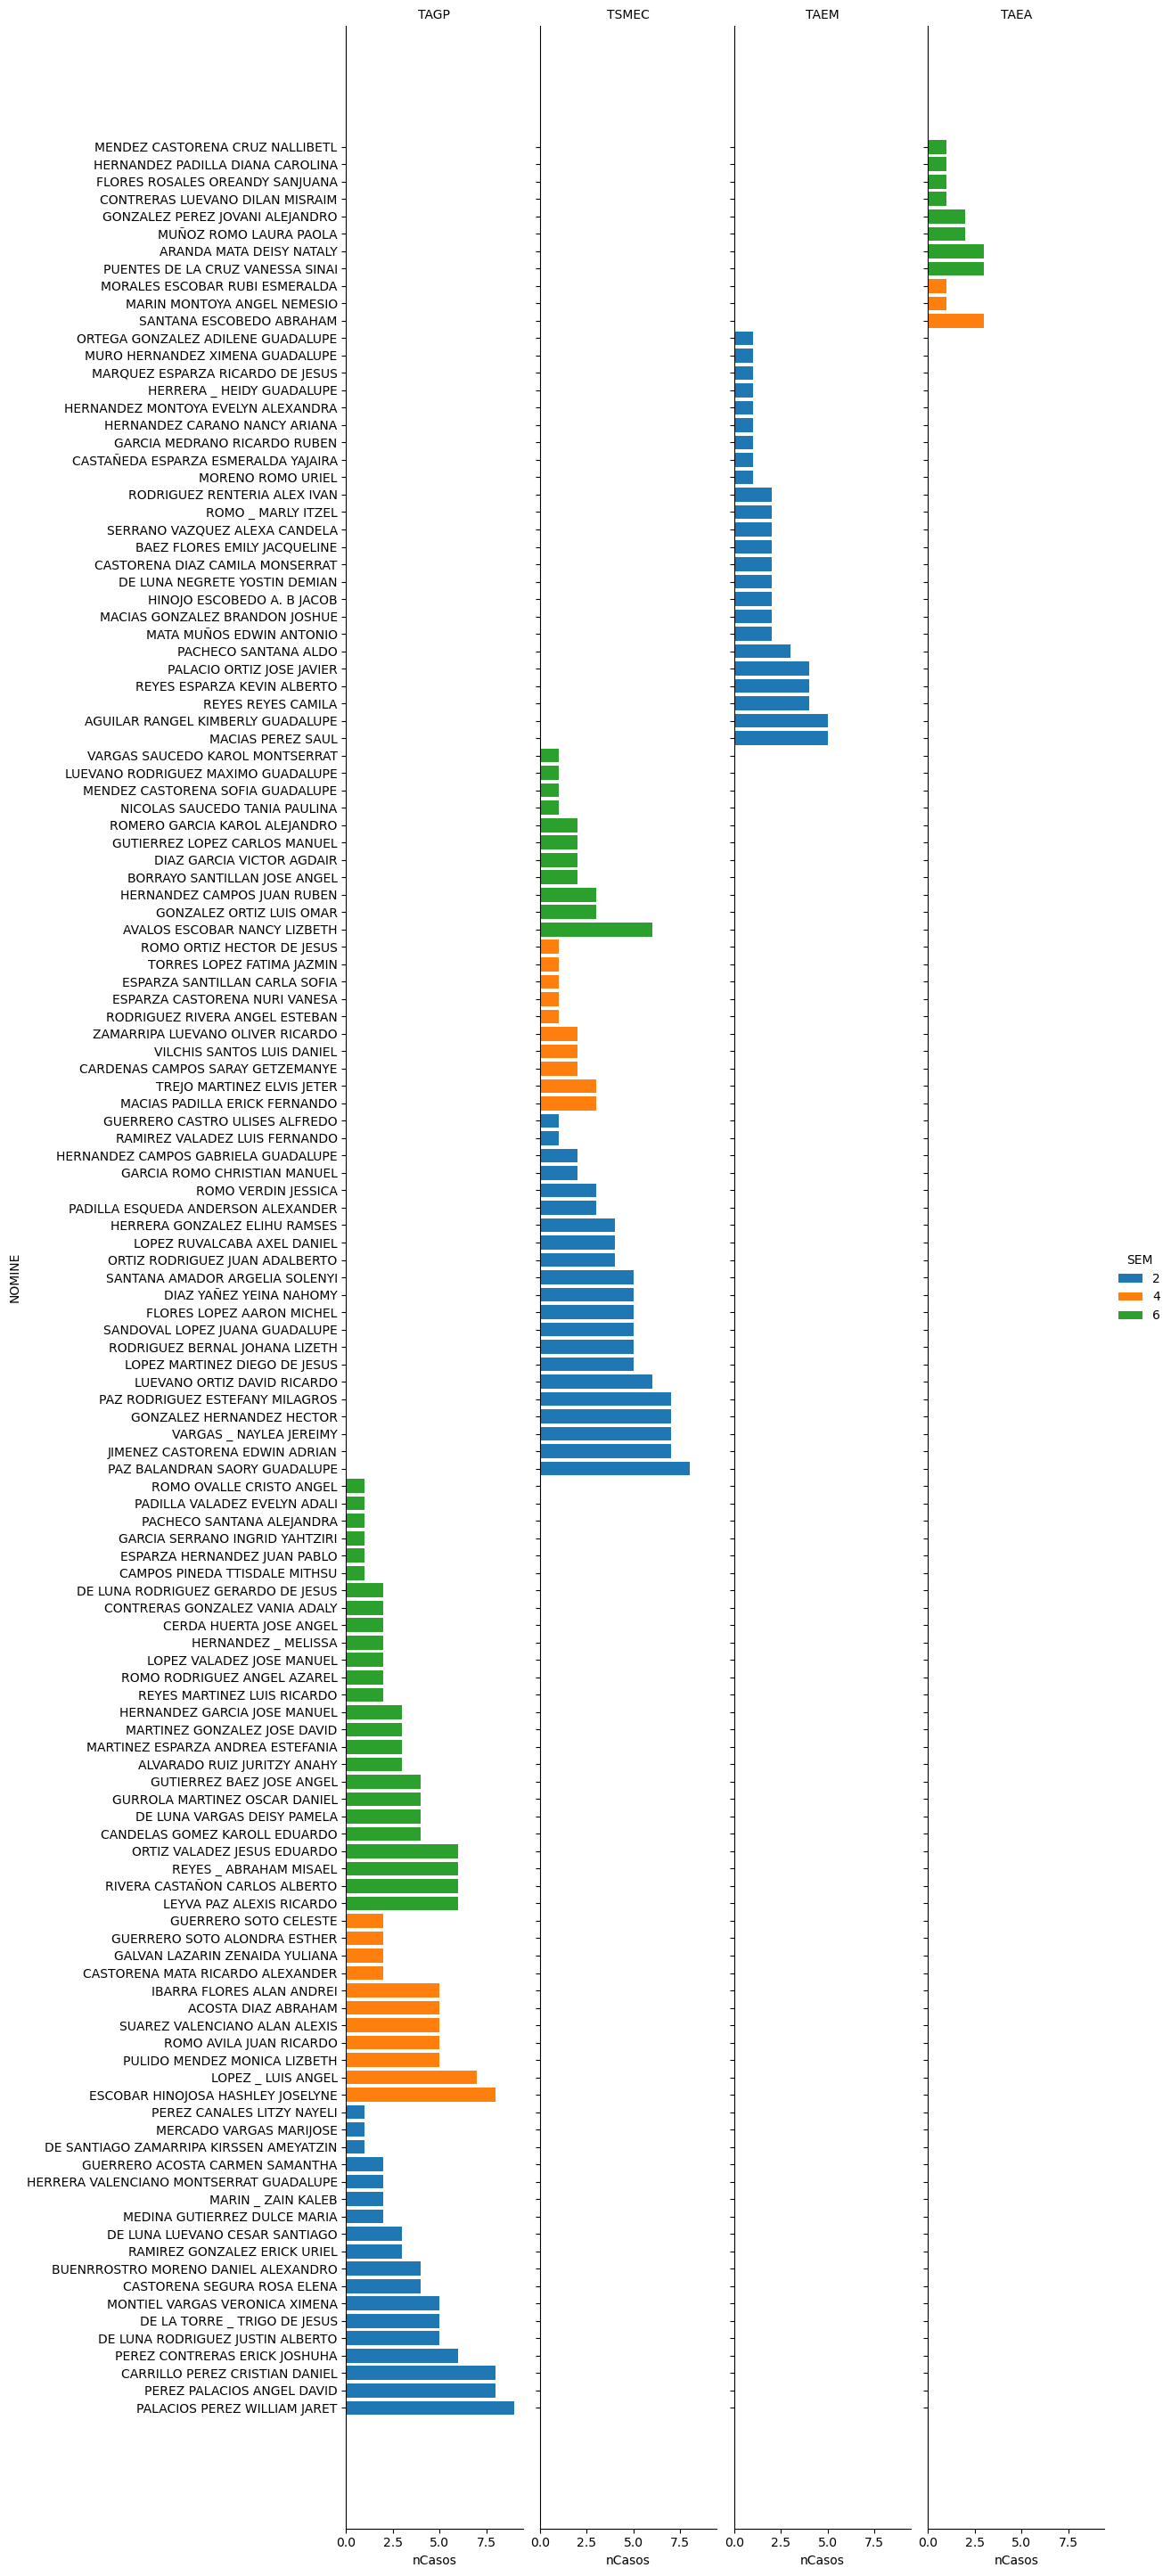

In [312]:


# ploteo por alumno
arep1 = cbx.loc[(cbx['PAR1']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','GPO','SEM','PAT','MAT','NOM'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
arep1=arep1.sort_values(['nCasos'],ascending=False)

apair = list()
for i,j,k in zip(arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = i + ' ' + str(j) + ' ' + k
    apair.append(salida)
arep1['NOMINE']=apair


arep1['NOMINE'] = arep1['NOMINE'].apply(str)

graph1 = sns.FacetGrid(arep1, col ='CARR', hue='SEM',height=29,aspect=0.11)

# map the above form facetgrid with some attributes
graph1.map(plt.barh, 'NOMINE', 'nCasos')

graph1.set_titles(row_template = '{row_name}', col_template = '{col_name}')
graph1.set_axis_labels("nCasos", "NOMINE")
graph1.add_legend()
#plt.subplots(figsize=(26, 22))

#plt.ylim(0,80)
plt.show()


In [313]:
arep1 = cbx.loc[(cbx['PAR1']<6) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','GPO','SEM','PAT','MAT','NOM'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
arep1=arep1.sort_values(['nCasos'],ascending=False)

apair = list()
for i,j,k in zip(arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = i + ' ' + str(j) + ' ' + k
    apair.append(salida)
arep1['NOMINE']=apair

print('De lo anterior, obtenemos que el porcentaje de alumnos con al menos una materia reprobada:')
print(round(len(arep1['NOMINE'].unique())/len(cbx['NCONT'].unique())*100,2), ' %')

De lo anterior, obtenemos que el porcentaje de alumnos con al menos una materia reprobada:
51.17  %


In [314]:
al =  cbx.loc[(cbx['PAR1']<11) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
al = al.groupby(['CARR','SEM'])['NCONT'].nunique()
al = al.reset_index()
al = al.rename(columns={al.columns[2]:'nAlumnos'})


inn = cbx.loc[(cbx['PAR1']>8) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
inn = inn.groupby(['CARR','SEM'])['NCONT'].nunique()
inn = inn.reset_index()
inn = inn.rename(columns={inn.columns[2]:'nUpg'})


inn_al = al
inn_al['nUpg'] = pd.Series(inn['nUpg'])
inn_al['Upg%'] = round((inn_al.nUpg/inn_al.nAlumnos)*100,1)
inn_al

CARR  SEM  nAlumnos  nUpg   Upg%
0   TAEA    4        13    13  100.0
1   TAEA    6        17    17  100.0
2   TAEM    2        31    24   77.4
3   TAGP    2        36    26   72.2
4   TAGP    4        56    47   83.9
5   TAGP    6        34    25   73.5
6  TSMEC    2        29    10   34.5
7  TSMEC    4        16    11   68.8
8  TSMEC    6        24    17   70.8

In [324]:


check = cbx.loc[(cbx['PAR1']>8) & (cbx['CARR'] == 'TSMEC') & (cbx['SEM'] == 2)]
check.groupby(['GPO','SEM'])['NCONT'].nunique()
print("En este gpo se observaron 10 alumnos con al menos una materia calificada con 9 0 10")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(check)


GPO  SEM
2A   2      10
Name: NCONT, dtype: int64

En este gpo se observaron 10 alumnos con al menos una materia calificada con 9 0 10


PLANTEL   CARR          GEN     TURNO  SEM GPO           NCONT  \
347   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050024   
351   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050036   
353   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050044   
354   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050054   
357   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050067   
358   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050074   
363   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050101   
366   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050114   
422   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050036   
429   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050074   
434   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050101   
437   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050114   
634   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050036   
637   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050054   
640   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050067   
646   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050101   
649   CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050114   
1228  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050024   
1232  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050036   
1235  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050054   
1238  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050067   
1239  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050074   
1244  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050101   
1247  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050114   
1314  CBTA 205  TSMEC  2023 - 2026  matutino    2  2A  23101012050086   
1320  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050024   
1324  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050036   
1327  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050054   
1330  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050067   
1331  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050074   
1336  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050101   
1339  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050114   
1423  CBTA 205  TSMEC  2023 - 2026  matutino    2  2A  23101012050086   
1429  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050024   
1433  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050036   
1436  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050054   
1439  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050067   
1440  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050074   
1445  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050101   
1448  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050114   
1691  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050036   
1694  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050054   
1697  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050067   
1703  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050101   
1706  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050114   
1983  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050018   
1990  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050036   
1993  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050054   
1996  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050067   
1997  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050074   
2002  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050101   
2005  CBTA 205  TSMEC  2024 - 2027  matutino    2  2A  24101012050114   

                     NOM        PAT        MAT                CURP  \
347     CHRISTOPHER IVAN    BORRAYO  SANTILLAN  BOSC091003HASRNHA4 

In [325]:
apair = list()
for i,j,k in zip(arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = i + ' ' + str(j) + ' ' + k
    apair.append(salida)
arep1['NOMINE']=apair

In [326]:
arep1 = cbx.loc[(cbx['PAR1']>8) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]

apair = list()
for i,j,k,l in zip(arep1['NCONT'],arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
arep1['NOMINE']=apair

arep1 = arep1.groupby(['CARR','GPO','SEM','NOMINE'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
arep1 =  arep1.sort_values(['nCasos'],ascending=False)
arep1 = arep1.reset_index()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(arep1)

C:\Users\reneb\AppData\Local\Temp\ipykernel_13564\3881500688.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index   CARR GPO  SEM                                             NOMINE  \
0       78   TAGP  2A    2       24101012050107-GARCIA ROMO BRITTANY DE JESUS   
1      105   TAGP  4A    4     23101012050084-PALACIOS RUIZ GABRIELA MICHELLE   
2      160  TSMEC  2A    2   24101012050101-CARRANZA ESQUIVEL KEMBERLIN MAYLI   
3      161  TSMEC  2A    2             24101012050114-VERDUZCO VAZQUEZ ANDRES   
4      155  TSMEC  2A    2              24101012050036-RODRIGUEZ _ IRWIN JAEL   
5       96   TAGP  4A    4               23101012050040-VALADEZ ROMO GABRIELA   
6       74   TAGP  2A    2            24101012050098-PEREZ _ NAHOMY GUADALUPE   
7       88   TAGP  4A    4       23101012050021-PEREZ MACIAS SELENE GUADALUPE   
8       56   TAGP  2A    2  24101012050020-RODRIGUEZ HERRERA DENNIS JAQUELINE   
9      106   TAGP  4A    4      23101012050085-MACIAS GONZALEZ PAULINA YAKSEL   
10      60   TAGP  2A    2    24101012050049-GONZALEZ ESPARZA TANIA GUADALUPE   
11     110   TAGP  4A    4     23101012050096-FLORES RODRIGUEZ JOSE GUADALUPE   
12     158  TSMEC  2A    2          24101012050067-CONTRERAS CERROS SOL ITZEL   
13     113   TAGP  4A    4       23101012050102-MONTOYA DE LUNA BLANCA JANETH   
14      57   TAGP  2A    2    24101012050028-LUEVANO SERRANO KATHERINE MICHEL   
15     116   TAGP  4A    4               23101012050107-MERCADO PEREA SAMANTA   
16     125   TAGP  4A    4        23101012050126-MACIAS OROZCO MIGUEL ANTONIO   
17      93   TAGP  4A    4        23101012050029-FLORES ARAIZA ANIBAL GABRIEL   
18     117   TAGP  4A    4           23101012050109-SAUCEDO LOPEZ KARLA MARIA   
19     118   TAGP  4A    4      23101012050110-VALENCIA PASILLAS LUIS ANTONIO   
20     119   TAGP  4A    4        23101012050111-YAÑEZ ROSAS MARIA DEL CARMEN   
21     120   TAGP  4A    4           23101012050112-MEZA ALVAREZ IRIS DANIELA   
22     121   TAGP  4A    4         23101012050114-LOMELI FLORES ANDREA SELENI   
23       7   TAEA  4A    4    23101012050046-CARRANZA ESQUIVEL CARMEN GORETTI   
24     157  TSMEC  2A    2    24101012050054-MARTINEZ MARIN ELENA DEL ROSARIO   
25     109   TAGP  4A    4                  23101012050094-DIAZ ROMAN RICARDO   
26      43   TAEM  2A    2     24101012050066-MARES CARRANZA ISABEL GUADALUPE   
27     107   TAGP  4A    4        23101012050091-CASTORENA VILLALOBOS CITLALI   
28     104   TAGP  4A    4              23101012050083-ZAMARRIPA GARCIA EDITH   
29      58   TAGP  2A    2     24101012050030-GUERRERO SUAREZ MELANY FERNANDA   
30     103   TAGP  4A    4         23101012050078-PALACIOS CARDONA ANA LUPITA   
31     101   TAGP  4A    4  23101012050067-TORRES GUERRERO YARISBEL DEL ROCIO   
32     159  TSMEC  2A    2    24101012050074-VITAL ESCOBAR FATIMA DEL ROSARIO   
33     126   TAGP  4A    4      23101012050128-SANCHEZ BAEZ MARIANA GUADALUPE   
34      18   TAEA  6A    6        22101012050019-ORTIZ SANTILLAN DAYANA LIZET   
35     124   TAGP  4A    4        23101012050125-DURON URRUTIA JOSE GUADALUPE   
36      92   TAGP  4A    4    23101012050027-ESCOBEDO GUERRERO BRENDA YESENIA   
37     123   TAGP  4A    4      23101012050124-CHAVEZ MARTINEZ TANIA VERONICA   
38      82   TAGP  4A    4  191011205A0024-RODRIGUEZ LANDEROS MARÍA GUADALUPE   
39      80   TAGP  4A    4  13101012050613-RODRIGUEZ LANDEROS JANETH CRISTINA   
40      31   TAEM  2A    2       24101012050005-CHAVEZ MORENO RAMSES EMILIANO   
41     131   TAGP  6A    6       22101012050010-MUÑOZ HERNANDEZ JOSHUA ISAIAH   
42     115   TAGP  4A    4  23101012050106-RODRIGUEZ NEGRETE SANJUANA DEL ...   
43      75   TAGP  2A    2        24101012050099-RODRIGUEZ ROMO DYLAN ALBERTO   
44      28   TAEA  6A    6           22101012050087-ORTIZ REYES MA. GUADALUPE   
45     100   TAGP  4A    4        23101012050062-LOPEZ FLORES MARIA GUADALUPE   
46      64   TAGP  2A    2     24101012050058-GARCIA REYES BRITANY MONSERRATH   
47      81   TAGP  4A    4           16101012050015-LOZANO BARBA MARIA GLORIA   
48      68   TAGP  2A    2   2410101

In [327]:
print('De lo anterior, obtenemos que el porcentaje de alumnos con al menos una materia con 9 o 10:')
print(round(len(arep1['NOMINE'].unique())/len(cbx['NCONT'].unique())*100,2), ' %')

De lo anterior, obtenemos que el porcentaje de alumnos con al menos una materia con 9 o 10:
74.22  %


<h1 style="color:red;">PROMEDIO INDIVIDUAL</h1>

In [328]:

arep1 = cbx.loc[(cbx['PAR1']<11) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]

apair = list()
for i,j,k,l in zip(arep1['NCONT'],arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
arep1['NOMINE']=apair

#agg("mean", axis="columns")


arep1 = arep1.groupby(['CARR','GPO','SEM','NOMINE'])['PAR1'].agg('mean')

arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'PAR1':'media'})
#arep1.media = arep1.media.round(2)
#arep1['media'] = arep1['media'].round(2)
arep1 = arep1.sort_values(['media'],ascending=False)
arep1 = arep1.reset_index()
arep1 = arep1.iloc[:,[1,2,4,5]]

promedio_individual = arep1


print('El promedio general del parcial I para cada alumno del plantel es:')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(promedio_individual)


El promedio general del parcial I para cada alumno del plantel es:


CARR GPO                                             NOMINE      media
0     TAGP  4A        23101012050126-MACIAS OROZCO MIGUEL ANTONIO  10.000000
1     TAGP  4A       23101012050102-MONTOYA DE LUNA BLANCA JANETH  10.000000
2     TAGP  4A        23101012050111-YAÑEZ ROSAS MARIA DEL CARMEN  10.000000
3    TSMEC  2A              24101012050036-RODRIGUEZ _ IRWIN JAEL   9.875000
4     TAGP  4A               23101012050040-VALADEZ ROMO GABRIELA   9.875000
5     TAGP  4A       23101012050021-PEREZ MACIAS SELENE GUADALUPE   9.875000
6     TAGP  4A         23101012050114-LOMELI FLORES ANDREA SELENI   9.857143
7    TSMEC  2A    24101012050054-MARTINEZ MARIN ELENA DEL ROSARIO   9.750000
8     TAEA  6A        22101012050019-ORTIZ SANTILLAN DAYANA LIZET   9.666667
9     TAGP  6A       22101012050010-MUÑOZ HERNANDEZ JOSHUA ISAIAH   9.666667
10    TAGP  6A             22101012050114-SANCHEZ BAEZ MARIA JOSE   9.666667
11    TAEA  6A           22101012050087-ORTIZ REYES MA. GUADALUPE   9.666667
12    TAGP  2A       24101012050107-GARCIA ROMO BRITTANY DE JESUS   9.666667
13   TSMEC  2A   24101012050101-CARRANZA ESQUIVEL KEMBERLIN MAYLI   9.625000
14   TSMEC  2A             24101012050114-VERDUZCO VAZQUEZ ANDRES   9.625000
15   TSMEC  2A          24101012050067-CONTRERAS CERROS SOL ITZEL   9.625000
16    TAGP  4A      23101012050085-MACIAS GONZALEZ PAULINA YAKSEL   9.625000
17    TAGP  4A      23101012050110-VALENCIA PASILLAS LUIS ANTONIO   9.571429
18    TAGP  4A           23101012050112-MEZA ALVAREZ IRIS DANIELA   9.571429
19    TAGP  4A           23101012050109-SAUCEDO LOPEZ KARLA MARIA   9.571429
20    TAGP  4A               23101012050107-MERCADO PEREA SAMANTA   9.571429
21   TSMEC  6A            22101012050033-DIAZ GARCIA BRIANA CORAL   9.500000
22    TAGP  4A     23101012050084-PALACIOS RUIZ GABRIELA MICHELLE   9.500000
23    TAGP  4A  191011205A0024-RODRIGUEZ LANDEROS MARÍA GUADALUPE   9.428571
24    TAGP  4A  13101012050613-RODRIGUEZ LANDEROS JANETH CRISTINA   9.428571
25    TAGP  2A  24101012050020-RODRIGUEZ HERRERA DENNIS JAQUELINE   9.333333
26    TAGP  4A      23101012050124-CHAVEZ MARTINEZ TANIA VERONICA   9.285714
27   TSMEC  4A           23101012050044-OLAYO _ JAKSIRI GUADALUPE   9.285714
28    TAGP  4A        23101012050091-CASTORENA VILLALOBOS CITLALI   9.285714
29    TAEA  4A    23101012050046-CARRANZA ESQUIVEL CARMEN GORETTI   9.250000
30    TAEM  2A       24101012050005-CHAVEZ MORENO RAMSES EMILIANO   9.250000
31    TAGP  2A            24101012050098-PEREZ _ NAHOMY GUADALUPE   9.222222
32    TAEA  6A                22101012050014-GOMEZ _ MITZY JUDITH   9.166667
33   TSMEC  4A   23101012050066-TORRES DE LA CRUZ JASSILEY JAZMIN   9.142857
34    TAEM  2A        24101012050004-CALZADA LEYVA ALAN GUILLERMO   9.125000
35   TSMEC  2A    24101012050074-VITAL ESCOBAR FATIMA DEL ROSARIO   9.125000
36    TAGP  4A        23101012050029-FLORES ARAIZA ANIBAL GABRIEL   9.125000
37    TAGP  4A              23101012050083-ZAMARRIPA GARCIA EDITH   9.125000
38    TAGP  4A    23101012050027-ESCOBEDO GUERRERO BRENDA YESENIA   9.125000
39    TAGP  2A     24101012050030-GUERRERO SUAREZ MELANY FERNANDA   9.111111
40    TAGP  4A  23101012050106-RODRIGUEZ NEGRETE SANJUANA DEL ...   9.000000
41    TAGP  4A                  23101012050094-DIAZ ROMAN RICARDO   9.000000
42    TAGP  4A        23101012050125-DURON URRUTIA JOSE GUADALUPE   9.000000
43    TAGP  4A      23101012050128-SANCHEZ BAEZ MARIANA GUADALUPE   9.000000
44    TAGP  6A          22101012050007-CALVILLO MACIAS JUAN JESUS   9.000000
45    TAGP  4A     23101012050096-FLORES RODRIGUEZ JOSE GUADALUPE   9.000000
46    TAEA  6A        22101012050067-MUÑOZ MUÑOZ CAMILA GUADALUPE   9.000000
47    TAGP  4A        23101012050062-LOPEZ FLORES MARIA GUADALUPE   9.000000
48   TSMEC  4A  23101012050061-HERNANDEZ ESCOBEDO FERNANDA SAN...   9.000000
49    TAGP  2A    24101012050049-GONZALEZ ESPARZA TANIA GUADALUPE   9.000000
50   TSMEC  6A                 21101012050094-GUTIERREZ ROMO RITA   9.000000
51

In [329]:
promedio_individual.columns
promedio_individual = promedio_individual.rename(columns={'NOMINE':'NOMBRE', 'media':'PROMEDIO'})
promedio_individual['PROMEDIO'] = pd.to_numeric(promedio_individual['PROMEDIO'])
promedio_individual['PROMEDIO'] = promedio_individual['PROMEDIO'].round(1)
print("promedio individual de todos los alumnos sin agrupar ni por carrera, ni por semestre ni por grupo")
promedio_individual

Index(['CARR', 'GPO', 'NOMINE', 'media'], dtype='object')

promedio individual de todos los alumnos sin agrupar ni por carrera, ni por semestre ni por grupo


CARR GPO                                         NOMBRE  PROMEDIO
0     TAGP  4A    23101012050126-MACIAS OROZCO MIGUEL ANTONIO      10.0
1     TAGP  4A   23101012050102-MONTOYA DE LUNA BLANCA JANETH      10.0
2     TAGP  4A    23101012050111-YAÑEZ ROSAS MARIA DEL CARMEN      10.0
3    TSMEC  2A          24101012050036-RODRIGUEZ _ IRWIN JAEL       9.9
4     TAGP  4A           23101012050040-VALADEZ ROMO GABRIELA       9.9
..     ...  ..                                            ...       ...
251  TSMEC  6A    22101012050068-AVALOS ESCOBAR NANCY LIZBETH       5.0
252   TAGP  6A          22101012050105-REYES _ ABRAHAM MISAEL       5.0
253   TAGP  6A  22101012050093-RIVERA CASTAÑON CARLOS ALBERTO       5.0
254   TAGP  2A  23101012050043-CARRILLO PEREZ CRISTIAN DANIEL       5.0
255   TAGP  6A        21101012050062-LEYVA PAZ ALEXIS RICARDO       5.0

[256 rows x 4 columns]

In [330]:
# promedio pero ahora ordenando resultados por grupo

In [331]:
arep1x = cbx.loc[(cbx['PAR1']<11) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]

apair = list()
for i,j,k,l in zip(arep1x['NCONT'],arep1x['PAT'],arep1x['MAT'], arep1x['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
arep1x['NOMINE']=apair

#agg("mean", axis="columns")


arep1x = arep1x.groupby(['CARR','SEM','NOMINE'])['PAR1'].agg('mean')
arep1x = arep1x.reset_index()


arep1x = arep1x.rename(columns={'PAR1':'media'})

#arep1.media = arep1.media.round(2)
#arep1['media'] = arep1['media'].round(2)
#arep1x = arep1x.sort_values(['media'],ascending=False)

arep1x['media'] = pd.to_numeric(arep1x['media'])
arep1x = arep1x.iloc[:,[0,1,2,3]]
arep1x.iloc[:,[3]] = round(arep1x.iloc[:,[3]] ,2)




promedio_general = arep1x

promedio_general = promedio_general.sort_values(['CARR','SEM','media'], ascending=False)

In [332]:
print("promedio individual de los alumnos pero agrupados por carrera y semestre")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(promedio_general)

promedio individual de los alumnos pero agrupados por carrera y semestre


CARR  SEM                                             NOMINE  media
239  TSMEC    6            22101012050033-DIAZ GARCIA BRIANA CORAL   9.50
232  TSMEC    6                 21101012050094-GUTIERREZ ROMO RITA   9.00
236  TSMEC    6        22101012050020-GARCIA RAMIREZ MEZTLI JUDITH   9.00
240  TSMEC    6      22101012050034-RODRIGUEZ PALOS JAIME EMMANUEL   9.00
243  TSMEC    6         22101012050043-LAZALDE PUENTES JOSE ALONSO   8.67
233  TSMEC    6         22101012050005-GONZALEZ LUEVANO LUIS ANGEL   8.50
251  TSMEC    6     22101012050073-ESQUIVEL HERNANDEZ NANCY KARINA   8.17
254  TSMEC    6    22101012050096-MENDEZ CASTORENA SOFIA GUADALUPE   8.00
252  TSMEC    6     22101012050079-VARGAS SAUCEDO KAROL MONTSERRAT   7.83
241  TSMEC    6      22101012050036-ROMERO CALVILLO MA. DEL CARMEN   7.67
244  TSMEC    6          22101012050044-FLORES ORTIZ DANIELA PAOLA   7.67
246  TSMEC    6           22101012050049-DIAZ GARCIA VICTOR AGDAIR   7.50
253  TSMEC    6       22101012050081-NICOLAS SAUCEDO TANIA PAULINA   7.50
237  TSMEC    6     22101012050022-CASTAÑEDA GARCIA ROEL ALEJANDRO   7.33
238  TSMEC    6    22101012050025-DE LA ROSA ARAIZA ADONAI ARMANDO   7.33
249  TSMEC    6          22101012050065-RUIZ FLORES JENIFER MICHEL   7.33
242  TSMEC    6  22101012050038-LUEVANO RODRIGUEZ MAXIMO GUADALUPE   7.00
255  TSMEC    6           22101012050113-ABELAR VASQUEZ JOSE ELIAN   7.00
248  TSMEC    6       22101012050062-ROMERO GARCIA KAROL ALEJANDRO   6.50
234  TSMEC    6        22101012050009-BORRAYO SANTILLAN JOSE ANGEL   6.33
247  TSMEC    6         22101012050051-HERNANDEZ CAMPOS JUAN RUBEN   6.33
235  TSMEC    6       22101012050013-GUTIERREZ LOPEZ CARLOS MANUEL   6.17
245  TSMEC    6            22101012050047-GONZALEZ ORTIZ LUIS OMAR   5.67
250  TSMEC    6        22101012050068-AVALOS ESCOBAR NANCY LIZBETH   5.00
220  TSMEC    4           23101012050044-OLAYO _ JAKSIRI GUADALUPE   9.29
225  TSMEC    4   23101012050066-TORRES DE LA CRUZ JASSILEY JAZMIN   9.14
224  TSMEC    4  23101012050061-HERNANDEZ ESCOBEDO FERNANDA SAN...   9.00
230  TSMEC    4          23101012050082-MACIAS GARCIA ARLETH ANALY   8.71
218  TSMEC    4       23101012050009-ESPARZA SANTILLAN CARLA SOFIA   8.29
223  TSMEC    4       23101012050060-HERRERA GAYTAN CARELI JOSELIN   8.29
217  TSMEC    4       23101012050008-ESPARZA CASTORENA NURI VANESA   7.71
216  TSMEC    4         23101012050003-BAEZ RUVALCABA KEVIN RAMSES   7.29
231  TSMEC    4    23101012050090-CARDENAS CAMPOS SARAY GETZEMANYE   6.86
226  TSMEC    4          23101012050073-TORRES LOPEZ FATIMA JAZMIN   6.71
219  TSMEC    4       23101012050033-MACIAS PADILLA ERICK FERNANDO   6.57
221  TSMEC    4      23101012050055-RODRIGUEZ RIVERA ANGEL ESTEBAN   6.57
222  TSMEC    4          23101012050058-ROMO ORTIZ HECTOR DE JESUS   6.43
228  TSMEC    4    23101012050075-ZAMARRIPA LUEVANO OLIVER RICARDO   6.29
227  TSMEC    4          23101012050074-TREJO MARTINEZ ELVIS JETER   6.00
229  TSMEC    4          23101012050080-VILCHIS SANTOS LUIS DANIEL   6.00
199  TSMEC    2              24101012050036-RODRIGUEZ _ IRWIN JAEL   9.88
202  TSMEC    2    24101012050054-MARTINEZ MARIN ELENA DEL ROSARIO   9.75
205  TSMEC    2          24101012050067-CONTRERAS CERROS SOL ITZEL   9.62
211  TSMEC    2   24101012050101-CARRANZA ESQUIVEL KEMBERLIN MAYLI   9.62
214  TSMEC    2             24101012050114-VERDUZCO VAZQUEZ ANDRES   9.62
206  TSMEC    2    24101012050074-VITAL ESCOBAR FATIMA DEL ROSARIO   9.12
195  TSMEC    2  24101012050024-BORRAYO SANTILLAN CHRISTOPHER IVAN   8.25
189  TSMEC    2          23101012050086-RODRIGUEZ CASTAÑEDA SILVIA   8.12
192  TSMEC    2      24101012050018-GUERRERO CASTRO ULISES ALFREDO   7.00
201  TSMEC    2        24101012050044-GARCIA ROMO CHRISTIAN MANUEL   6.75
204  TSMEC    2  24101012050062-HERNANDEZ CAMPOS GABRIELA GUADA...   6.62
207  TSMEC    2      24101012050076-ORTIZ RODRIGUEZ JUAN ADALBERTO   6.12
190  TSMEC    2                 24101012050002-ROMO VERDIN JESSICA   6.00
213  TSMEC

In [333]:
reprobados['idx']=[f"{a} {b}" for a,b in zip(reprobados.CARR,reprobados.GPO)]

<h1 style="color:red;">MATRIZ</h1>

In [334]:
# how many asigments filed per student
print('Se muestra a continuación la cantidad de alumnos (por grupo) y que tienen 1,2,..., y hasta 9 asignaturas reprobadas')
outn = pd.DataFrame()
listado = []
for i in reprobados['CONT'].unique():
    outx = reprobados.loc[(reprobados['CONT']==i)].groupby('idx').nunique()
    listado.append(i)

    outn = pd.concat([outn,outx['NCONT']],axis=1)


outn.columns=listado
outn = outn.fillna(0)
outn = outn.reindex(sorted(outn.columns),axis=1)
outn = pd.DataFrame(outn)

for col in  outn.columns[0:]:
    outn[col] = pd.to_numeric(outn[col], downcast='integer', errors='coerce')

matriz = outn

Se muestra a continuación la cantidad de alumnos (por grupo) y que tienen 1,2,..., y hasta 9 asignaturas reprobadas


In [335]:
matriz = matriz.reset_index()
matriz = matriz.rename(columns={'index':'GPO/#ASIGS'})
matriz.columns = ['GPO','1\nAsig','2\nAsig','3\nAsig','4\nAsig','5\nAsig','6\nAsig','7\nAsig','8\nAsig','9\nAsig']
matriz

GPO  1\nAsig  2\nAsig  3\nAsig  4\nAsig  5\nAsig  6\nAsig  7\nAsig  \
0   TAEA 4A        2        0        1        0        0        0        0   
1   TAEA 6A        4        2        2        0        0        0        0   
2   TAEM 2A        9        9        1        3        2        0        0   
3   TAGP 2A        3        4        2        2        3        1        0   
4   TAGP 6A        6        7        4        4        0        4        0   
5  TSMEC 2A        2        2        2        3        6        1        4   
6  TSMEC 4A        5        3        2        0        0        0        0   
7  TSMEC 6A        4        4        2        0        0        1        0   
8   TAGP 4A        0        4        0        0        5        0        1   

   8\nAsig  9\nAsig  
0        0        0  
1        0        0  
2        0        0  
3        2        1  
4        0        0  
5        1        0  
6        0        0  
7        0        0  
8        1        0

In [336]:
destacados =cbx.loc[cbx['PAR1']>8]

apair = list()
for i,j,k,l in zip(destacados['NCONT'],destacados['PAT'],destacados['MAT'], destacados['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
destacados['NOMINE']=apair

destacados =destacados.groupby(['CARR','GPO','NOMINE']).agg({'NCONT':'count'})
destacados=destacados.rename(columns={'NCONT':'CONT'})

destacados = destacados.reset_index()
destacados['idx']=[f"{a} {b}" for a,b in zip(destacados.NOMINE,destacados.GPO)]

C:\Users\reneb\AppData\Local\Temp\ipykernel_13564\1681592034.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [337]:
asigna =cbx.loc[cbx['PAR1']<18]

apair = list()
for i,j,k,l in zip(asigna['NCONT'],asigna['PAT'],asigna['MAT'], asigna['NOM']):
    salida = str(i) + '-' + str(j) + ' ' + str(k) + ' '+ str(l)
    apair.append(salida)
asigna['NOMINE']=apair

asigna =asigna.groupby(['CARR','GPO','NCONT','NOMINE']).agg({'ASIG':'count'})
asigna=asigna.rename(columns={'ASIG':'ASIGS'})

asigna = asigna.reset_index()
asigna['idy']=[f"{a} {b}" for a,b in zip(asigna.NOMINE,asigna.GPO)]
#destacados['perc']=round((destacados.CONT/destacados.ASIGS)*100,1)

In [338]:
coinci = pd.merge(destacados, asigna, left_on='idx', right_on='idy', how='left').drop('idy', axis=1)

coinci['%'] = round((coinci.CONT/coinci.ASIGS)*100,1)
coinci['Ratio'] = coinci['CONT'].map(str) + '/' + coinci['ASIGS'].map(str)
coinci = coinci.rename(columns={'NOMINE_y':'NOMINE'})
coinci =coinci.loc[coinci['%']>75].sort_values(['%'],ascending=False)
coinci = coinci.reset_index()
coinci = coinci.loc[:,['idx','%','Ratio']]
coinci = coinci.rename(columns={'idx':'NOM'})
tab_destacados = coinci

print('Hay 37 alumnos destacados que tuvieron calificaciones de 9 o de 10 en más del 75% de las asignaturas que están cursando. Por ejemplo: MONTOYA DE LUNA BLANCA JANETH obtuvo calificaciones de 9 o 10 en el 100% de sus asignaturas, es decir, en 7 de 7. Para fines de este documento, llamaremos a estos alumnos "Alumnos destacados".')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tab_destacados)



Hay 37 alumnos destacados que tuvieron calificaciones de 9 o de 10 en más del 75% de las asignaturas que están cursando. Por ejemplo: MONTOYA DE LUNA BLANCA JANETH obtuvo calificaciones de 9 o 10 en el 100% de sus asignaturas, es decir, en 7 de 7. Para fines de este documento, llamaremos a estos alumnos "Alumnos destacados".


NOM      % Ratio
0     23101012050102-MONTOYA DE LUNA BLANCA JANETH 4A  100.0   7/7
1         23101012050112-MEZA ALVAREZ IRIS DANIELA 4A  100.0   7/7
2    23101012050110-VALENCIA PASILLAS LUIS ANTONIO 4A  100.0   7/7
3         23101012050109-SAUCEDO LOPEZ KARLA MARIA 4A  100.0   7/7
4             23101012050107-MERCADO PEREA SAMANTA 4A  100.0   7/7
5       23101012050114-LOMELI FLORES ANDREA SELENI 4A  100.0   7/7
6      22101012050019-ORTIZ SANTILLAN DAYANA LIZET 6A  100.0   6/6
7   23101012050096-FLORES RODRIGUEZ JOSE GUADALUPE 4A  100.0   7/7
8      23101012050126-MACIAS OROZCO MIGUEL ANTONIO 4A  100.0   7/7
9     22101012050010-MUÑOZ HERNANDEZ JOSHUA ISAIAH 6A  100.0   6/6
10   23101012050085-MACIAS GONZALEZ PAULINA YAKSEL 4A  100.0   8/8
11  23101012050084-PALACIOS RUIZ GABRIELA MICHELLE 4A  100.0   8/8
12            23101012050040-VALADEZ ROMO GABRIELA 4A  100.0   8/8
13           24101012050036-RODRIGUEZ _ IRWIN JAEL 2A  100.0   8/8
14    23101012050021-PEREZ MACIAS SELENE GUADALUPE 4A  100.0   8/8
15    24101012050107-GARCIA ROMO BRITTANY DE JESUS 2A  100.0   9/9
16  24101012050101-CARRANZA ESQUIVEL KEMBERLIN MAY...  100.0   8/8
17          24101012050114-VERDUZCO VAZQUEZ ANDRES 2A  100.0   8/8
18        22101012050087-ORTIZ REYES MA. GUADALUPE 6A  100.0   6/6
19     23101012050111-YAÑEZ ROSAS MARIA DEL CARMEN 4A  100.0   7/7
20         24101012050098-PEREZ _ NAHOMY GUADALUPE 2A   88.9   8/9
21  24101012050020-RODRIGUEZ HERRERA DENNIS JAQUEL...   88.9   8/9
22  24101012050054-MARTINEZ MARIN ELENA DEL ROSARI...   87.5   7/8
23       24101012050067-CONTRERAS CERROS SOL ITZEL 2A   87.5   7/8
24  23101012050046-CARRANZA ESQUIVEL CARMEN GORETT...   87.5   7/8
25     23101012050029-FLORES ARAIZA ANIBAL GABRIEL 4A   87.5   7/8
26  23101012050106-RODRIGUEZ NEGRETE SANJUANA DEL ...   85.7   6/7
27   23101012050124-CHAVEZ MARTINEZ TANIA VERONICA 4A   85.7   6/7
28     23101012050125-DURON URRUTIA JOSE GUADALUPE 4A   85.7   6/7
29               23101012050094-DIAZ ROMAN RICARDO 4A   85.7   6/7
30     23101012050091-CASTORENA VILLALOBOS CITLALI 4A   85.7   6/7
31  191011205A0024-RODRIGUEZ LANDEROS MARÍA GUADAL...   85.7   6/7
32  13101012050613-RODRIGUEZ LANDEROS JANETH CRIST...   85.7   6/7
33          22101012050114-SANCHEZ BAEZ MARIA JOSE 6A   83.3   5/6
34         22101012050033-DIAZ GARCIA BRIANA CORAL 6A   83.3   5/6
35  24101012050049-GONZALEZ ESPARZA TANIA GUADALUP...   77.8   7/9
36  24101012050028-LUEVANO SERRANO KATHERINE MICHE...   77.8   7/9

In [339]:
tot_destacados = round(len(coinci['NOM'].unique()))
tot_destacados

37

In [340]:
print('De lo anterior, obtenemos que el porcentaje de Alumnos destacados es:')
print(round(len(coinci['NOM'].unique())/len(cbx['NCONT'].unique())*100,2), ' %')
destacados_perc = round(len(coinci['NOM'].unique())/len(cbx['NCONT'].unique())*100,2)
destacados_perc

De lo anterior, obtenemos que el porcentaje de Alumnos destacados es:
14.45  %


14.45

In [341]:
print('Se muestra a continuación la cantidad de alumnos (por grupo) y que tienen 1,2,..., o hasta 9 asignaturas con calificación con 9 o 10')

destacados['idx']=[f"{a} {b}" for a,b in zip(destacados.CARR,destacados.GPO)]

outn = pd.DataFrame()
listado = []
for i in destacados['CONT'].unique():
    #outx = reprobados.loc[(reprobados['CONT']==i)].groupby('idx').nunique()
    outx = destacados.loc[(destacados['CONT']==i)].groupby('idx').nunique()
    listado.append(i)

    outn = pd.concat([outn,outx['NOMINE']],axis=1)


outn.columns=listado
outn = outn.fillna(0)
outn = outn.reindex(sorted(outn.columns),axis=1)
outn = pd.DataFrame(outn)
for col in  outn.columns[0:]:
    outn[col] = pd.to_numeric(outn[col], downcast='integer', errors='coerce')
outn = outn.sort_index()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(outn)

Se muestra a continuación la cantidad de alumnos (por grupo) y que tienen 1,2,..., o hasta 9 asignaturas con calificación con 9 o 10


1   2  3  4  5   6   7  8  9
TAEA 4A    4   2  3  3  0   0   1  0  0
TAEA 6A    3   4  5  3  0   2   0  0  0
TAEM 2A    7   5  4  4  2   2   0  0  0
TAGP 2A    4   6  2  4  2   3   2  2  1
TAGP 4A    2   5  5  3  5  13  10  4  0
TAGP 6A   11  10  1  1  1   1   0  0  0
TSMEC 2A   2   1  0  1  0   1   2  3  0
TSMEC 4A   4   1  2  2  2   0   0  0  0
TSMEC 6A   5   3  4  4  1   0   0  0  0

In [342]:

"""
import plotly.express as px

fig = px.imshow(outn, color_continuous_scale='Viridis', aspect="auto")
fig.update_traces(text=outn, texttemplate="%{text}")
fig.update_xaxes(side="top")
fig.show()
"""

'\nimport plotly.express as px\n\nfig = px.imshow(outn, color_continuous_scale=\'Viridis\', aspect="auto")\nfig.update_traces(text=outn, texttemplate="%{text}")\nfig.update_xaxes(side="top")\nfig.show()\n'

Número de materias con calificación de 9 o 10 observadas por alumno.


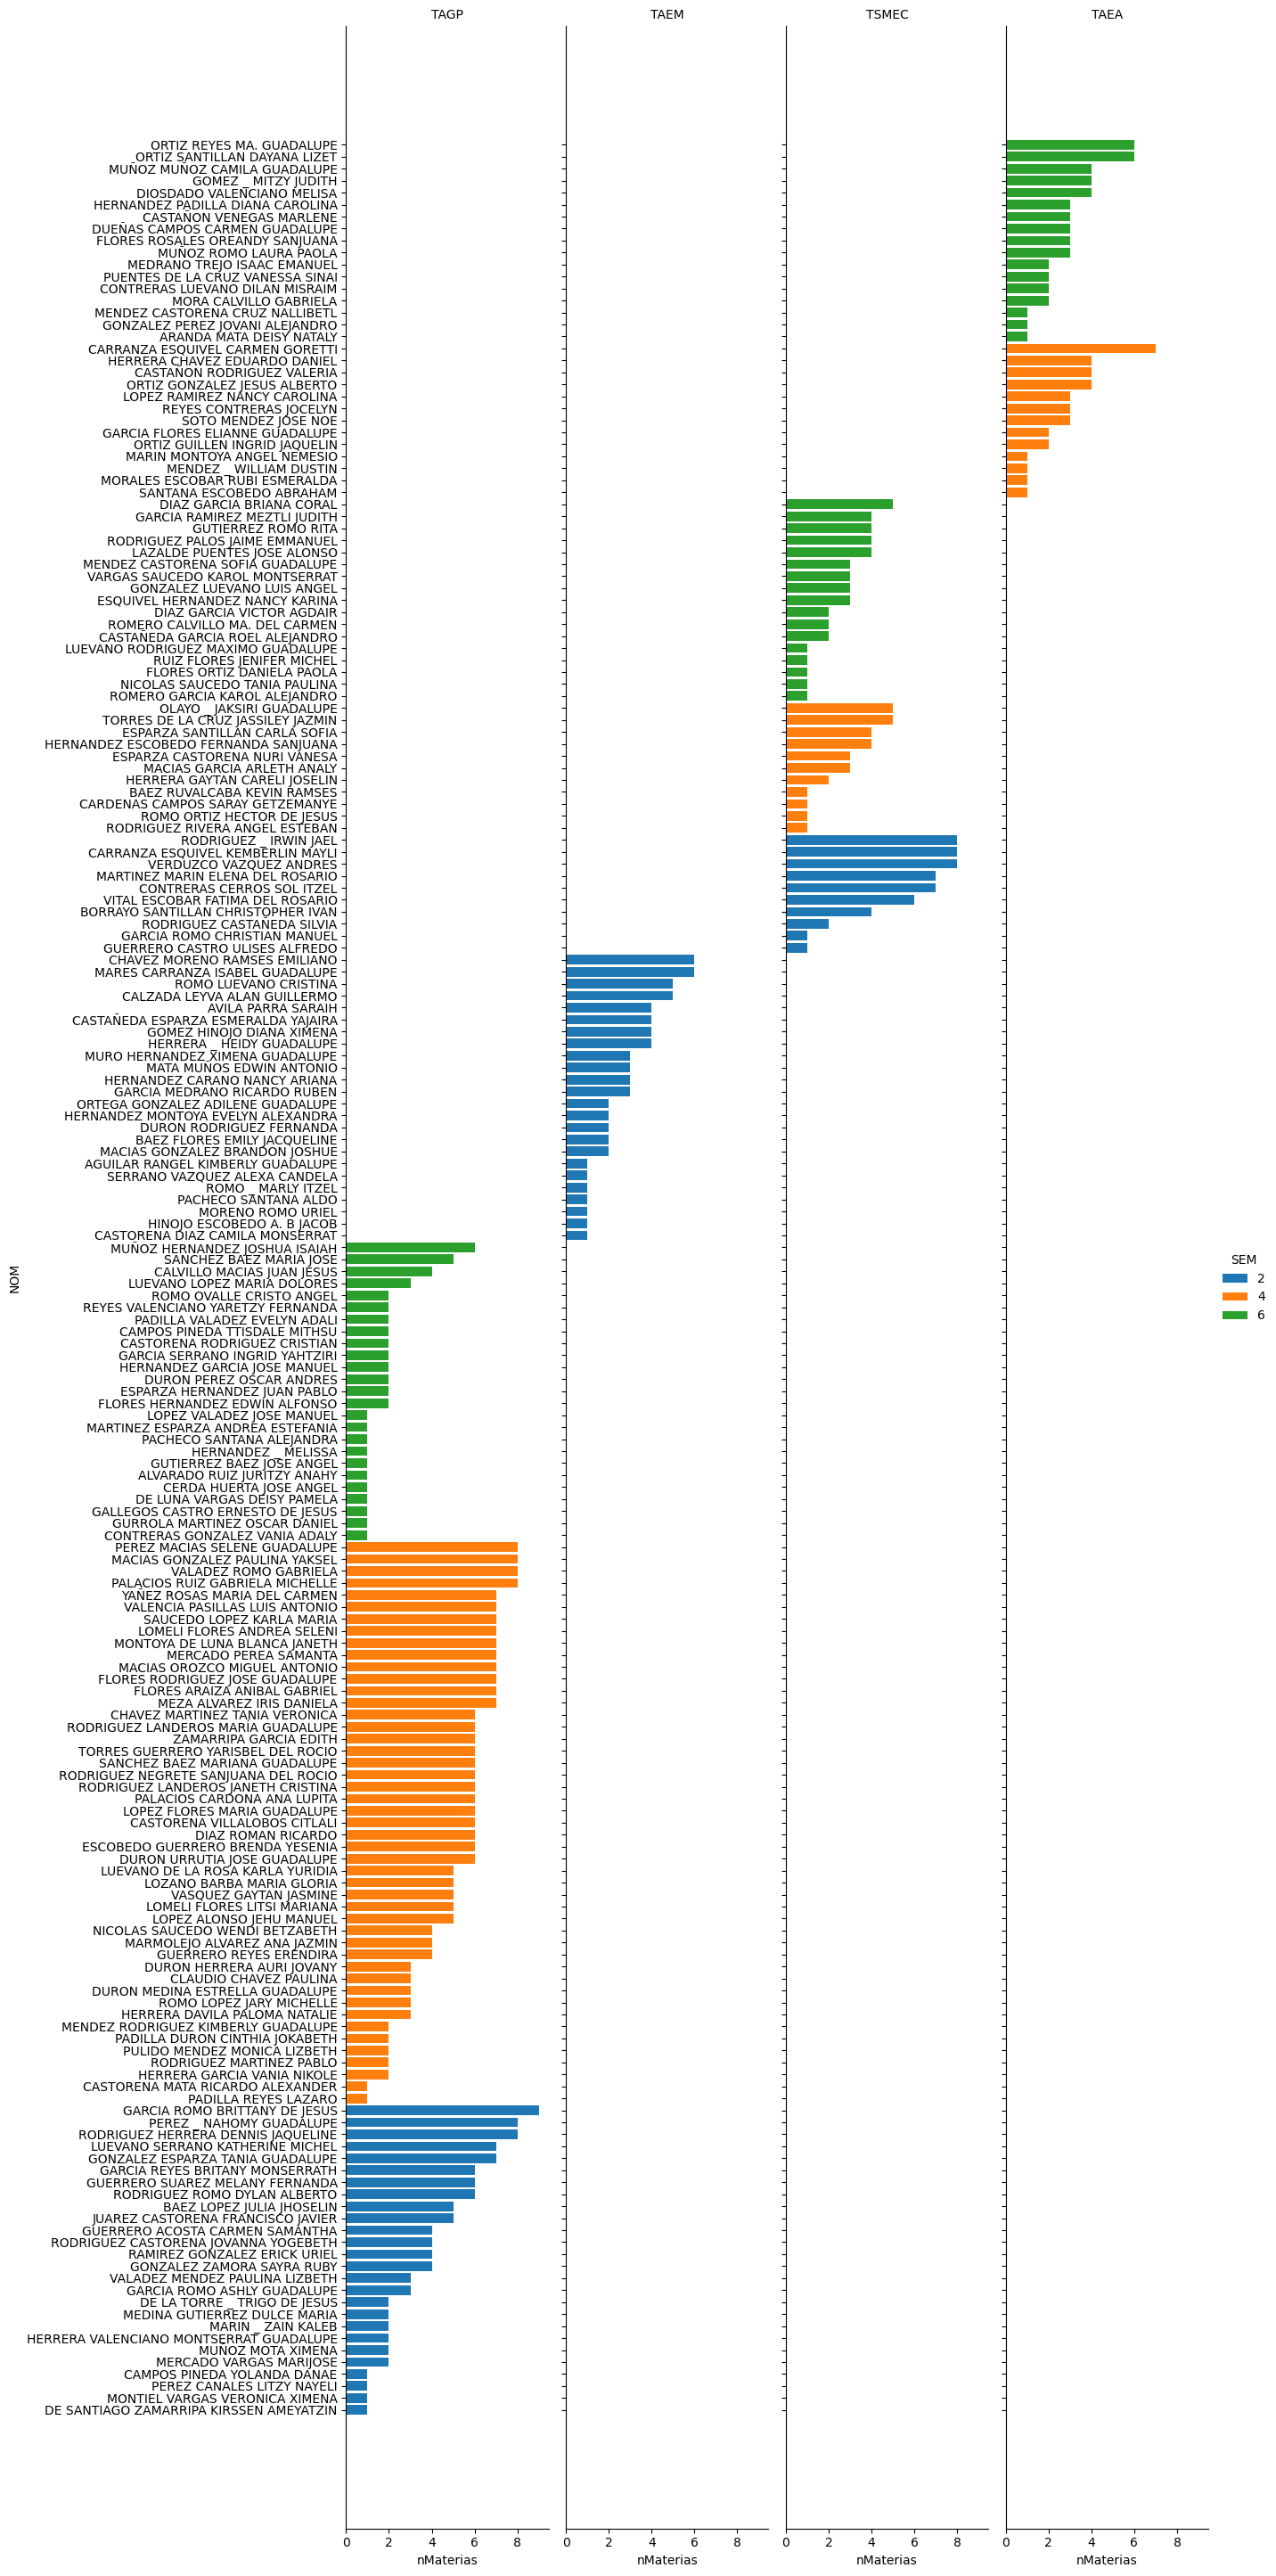

In [225]:


print('Número de materias con calificación de 9 o 10 observadas por alumno.')

# ploteo por alumno
arep1 = cbx.loc[(cbx['PAR1']>8) & (cbx['PERIODO'] == 'SEMESTRAL 2 - 2024')]
arep1 = arep1.groupby(['CARR','GPO','SEM','PAT','MAT','NOM'])['NCONT'].count()
arep1 = arep1.reset_index()
arep1=arep1.rename(columns={'NCONT':'nCasos'})
arep1=arep1.sort_values(['nCasos'],ascending=True)

apair = list()
for i,j,k in zip(arep1['PAT'],arep1['MAT'], arep1['NOM']):
    salida = i + ' ' + str(j) + ' ' + k
    apair.append(salida)
arep1['NOMINE']=apair


arep1['NOMINE'] = arep1['NOMINE'].apply(str)

graph2 = sns.FacetGrid(arep1, col ='CARR', hue='SEM',height=29,aspect=0.12)

# map the above form facetgrid with some attributes
graph2.map(plt.barh, 'NOMINE', 'nCasos')

graph2.set_titles(row_template = '{row_name}', col_template = '{col_name}')
graph2.set_axis_labels("nMaterias", "NOM")
graph2.add_legend()
#plt.subplots(figsize=(26, 22))

#plt.ylim(0,80)
plt.show()



In [226]:
import os

file_path = 'index.html'

In [228]:
# 3. Read the existing HTML template from 'index.html'
with open('index1.html', 'r',encoding='utf-8') as file:
    html_content = file.read()

# 4. Replace placeholders with values from the first row
html_content = html_content.replace("{{matricula}}", str(matricula))
html_content = html_content.replace("{{carreras}}", str(tot_carreras))
html_content = html_content.replace("{{tot_asig}}", str(tot_asig))
html_content = html_content.replace("{{docentes}}", str(docentes))
html_content = html_content.replace("{{mean}}", str(mean))
html_content = html_content.replace("{{sigma}}", str(sd))

html_content = html_content.replace("{{reprobados}}", str(cont_reprobados))
html_content = html_content.replace("{{reprobacion}}", str(repro_perc))

html_content = html_content.replace("{{en_riesgo}}", str(en_riesgo))
html_content = html_content.replace("{{riesgo_perc}}", str(riesgo_perc))
html_content = html_content.replace("{{todas}}", str(todas))

html_content = html_content.replace("{{destacados}}", str(tot_destacados))
html_content = html_content.replace("{{destacados_perc}}", str(destacados_perc))

mat_por_gpo_html = mat_por_gpo.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{tab_mat_sem}}", mat_por_gpo_html)

#for plotly
g1.write_html("g.html")  # Save the Plotly figure as an HTML file
fig2.write_html("fig2.html")  # Save the Plotly figure as an HTML file
fig3.write_html("fig3.html")  # Save the Plotly figure as an HTML file

# Export the plot to an HTML file from matplotlib
"""
import mpld3
g_html = mpld3.fig_to_html(g)
with open("plot.html", "w") as f:
    f.write(g_html)
"""

html_content = html_content.replace("<iframe id=fig1 src=\"g.html\" width=\"95%\" height=\"400\"></iframe>", 
                                    f'<iframe id=fig1 src="g.html" width="95%" height="400" style="border:none;"></iframe>')
html_content = html_content.replace("<iframe id=fig2 src=\"fig2.html\" width=\"300\" height=\"400\"></iframe>", 
                                    f'<iframe id=fig2 src="fig2.html" width="300" height="400" style="border:none;"></iframe>')
html_content = html_content.replace("<iframe id=fig3 src=\"fig3.html\" width=\"300\" height=\"400\"></iframe>", 
                                    f'<iframe id=fig3 src="fig3.html" width="300" height="400" style="border:none;"></iframe>')

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

meanstd_html = meanstd.to_html(classes='table table-bordered table-hover', index=True)
html_content = html_content.replace("{{tab_promedio}}", meanstd_html)

promInd_html = promedio_general.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{tab_promedio_ind}}", promInd_html)

repCarr_html = tabla_reprobados.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{tab_rep_car_perc}}", repCarr_html)

matrix_html = matriz.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{matriz}}", matrix_html)

riesgo_html = alumnos_en_riesgo.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{alto_riesgo}}", riesgo_html)

rep_asig_html = rep_asig.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{rep_asig}}", rep_asig_html)

asig_most_frec_final_html = asig_most_frec_final.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{asig_most_frec_final}}", asig_most_frec_final_html)

destac_html = tab_destacados.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{al_destacados}}", destac_html)

by_group_asigs_rep_html = by_group_asigs_rep.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{by_group_asigs_rep}}", by_group_asigs_rep_html)

glos_html = glosario.to_html(classes='table table-bordered table-hover', index=False)
html_content = html_content.replace("{{glosario}}", glos_html)



# 9. Save the final updated HTML file
with open('index.html', 'w', encoding='utf-8') as sitio:
    sitio.write(html_content)

# 10. Display the final HTML content in Jupyter
#display(HTML(html_content))

print("HTML file has been updated and saved as 'index_final.html'.")

'\nimport mpld3\ng_html = mpld3.fig_to_html(g)\nwith open("plot.html", "w") as f:\n    f.write(g_html)\n'

106176

HTML file has been updated and saved as 'index_final.html'.
